# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Collection

In [ ]:
df = pd.read_csv("../data/raw/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Research Questions and Objectives

## Primary Research Question:
**"What factors most significantly influence student exam performance, and can we predict a student's exam score based on their study habits, socioeconomic background, and support systems?"**

## Specific Research Questions:
1. **Which factors have the strongest correlation with exam scores?**
   - Does study time matter more than previous performance?
   - How much do socioeconomic factors (family income, parental education) impact scores?

2. **What is the relative importance of controllable vs. uncontrollable factors?**
   - Controllable: Hours studied, attendance, sleep hours
   - Uncontrollable: Family income, parental education, distance from home

3. **Can we build a predictive model to identify at-risk students early?**
   - What level of accuracy can we achieve?
   - Which machine learning algorithm performs best for this educational data?

4. **Are there unexpected patterns or anomalies in student performance?**
   - Do students with low study hours ever achieve high scores?
   - What role does motivation level play compared to actual study time?

# Initial Inspection

In [3]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Overview:
Shape: (6607, 20)
Total Records: 6607
Total Features: 20
Memory Usage: 4.77 MB


In [4]:
print("Shape:", df.shape)

Shape: (6607, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

*Divide the numerical and categorical columns:*

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [9]:
numerical_cols = df.select_dtypes(include=['int64']).columns
numerical_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

*Unique value counts for categorical columns:*

Choosing the Right Encoding Strategy:

Low Cardinality (2-5 unique values): Use One-Hot Encoding (creates binary columns)

Medium Cardinality (5-20 unique values): Use Label Encoding or One-Hot (depends on model)

High Cardinality (>50 unique values): Target Encoding, Frequency Encoding, or drop the column

In [10]:
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values


*Check missing (NULL) values:*

In [11]:
print("Do have NULL values?:", df.isnull().any().any()) # True -> The dataset has missing values
#df.isnull().any()
print("How many NULL values the dataset have?")
print(df.isnull().sum())

Do have NULL values?: True
How many NULL values the dataset have?
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [12]:
print("Missing values analysis: ")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Missing values analysis: 
                          Missing_Count  Percentage
Parental_Education_Level             90    1.362192
Teacher_Quality                      78    1.180566
Distance_from_Home                   67    1.014076


*Check duplicate values:*

In [13]:
print("Does the dataset has any duplicate values?", df.duplicated().any()) # True -> The dataset has duplicated rows
print("Total number of duplicate values =", df.duplicated().sum())

# # If duplicates exist, remove them:
# if df.duplicated().any():
#     df = df.drop_duplicates()
#     print(f"Shape after removing duplicates: {df.shape}")

Does the dataset has any duplicate values? False
Total number of duplicate values = 0


# Data Cleaning: Handle Missing Values

Handling missing values for categorical columns

Ordinal Categorical: Teacher_Quality, Parental_Education_Level, Distance_from_Home

Strategy:
- Teacher_Quality: Filled with 'Unknown' (validated to be non-outlier)
- Parental_Education_Level: Filled with 'Unknown' (validated to be non-outlier)  
- Distance_from_Home: Filled with mode (most common value)

In [14]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Unknown')
print("Number of missing values in the Teacher_Quality column after handling =",df['Teacher_Quality'].isnull().sum())

Number of missing values in the Teacher_Quality column after handling = 0


Verify if "Unknown" category makes sense for Teacher_Quality:

If "Unknown" mean is close to overall mean -> Good decision 

If "Unknown" mean is extreme outlier -> Reconsider

Decision: Unknown = 66.64 is only 0.6 points below the overall mean. It behaves like a real category (similar to "Low"). No extreme deviation that would bias our model.

In [15]:
print("Exam Score by Teacher_Quality:")
print(df[df['Teacher_Quality'].notnull()]['Exam_Score'].describe())

# After filling missing values
print("\nValidating 'Unknown' category impact:")
print(df.groupby('Teacher_Quality')['Exam_Score'].agg(['mean', 'count']))

print("\nOverall mean Exam Score:", df['Exam_Score'].mean())

Exam Score by Teacher_Quality:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

Validating 'Unknown' category impact:
                      mean  count
Teacher_Quality                  
High             67.676939   1947
Low              66.753425    657
Medium           67.109299   3925
Unknown          66.641026     78

Overall mean Exam Score: 67.23565914938702


In [16]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('Unknown')
print("Number of missing values in the Parental_Education_Level column after handling =", df['Parental_Education_Level'].isnull().sum())

Number of missing values in the Parental_Education_Level column after handling = 0


Verify if "Unknown" category makes sense for Parental_Education_Level:

In [17]:
print("Impact of 'Unknown' Parental_Education_Level:")
print(df.groupby('Parental_Education_Level')['Exam_Score'].agg(['mean', 'count']).sort_values('mean', ascending=False))

print("\nOverall mean Exam Score:", df['Exam_Score'].mean())

Impact of 'Unknown' Parental_Education_Level:
                               mean  count
Parental_Education_Level                  
Postgraduate              67.970881   1305
College                   67.315737   1989
Unknown                   67.055556     90
High School               66.893577   3223

Overall mean Exam Score: 67.23565914938702


In [18]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
print("Number of missing values in the Distance_from_Home column after handling =", df['Distance_from_Home'].isnull().sum())

Number of missing values in the Distance_from_Home column after handling = 0


Verify mode imputation for Distance_from_Home:

In [19]:
print("\nImpact of Distance_from_Home on Exam Score:")
print(df.groupby('Distance_from_Home')['Exam_Score'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))

print(f"\nMode used for imputation: {df['Distance_from_Home'].mode()[0]}")
print(f"Overall mean Exam Score: {df['Exam_Score'].mean():.2f}")


Impact of Distance_from_Home on Exam Score:
                         mean  median  count
Distance_from_Home                          
Near                67.493799    67.0   3951
Moderate            66.981481    67.0   1998
Far                 66.457447    66.0    658

Mode used for imputation: Near
Overall mean Exam Score: 67.24


In [20]:
# Check NULL values after handling:
df.isnull().any()
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# EDA: Univariate Analysis

*Univariate Analysis of Target Variable (Exam_Score)*

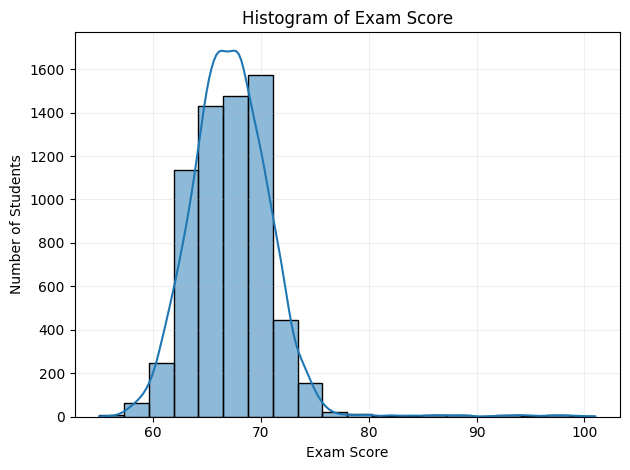

In [21]:
# plt.hist(df['Exam_Score'], bins=20, histtype='bar', orientation='vertical')
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.title("Histogram of Exam Score")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [22]:
# Exam Score -> Low variance and slightly left-skewed
print("Descriptive Statistics:")
print(df['Exam_Score'].describe())

Descriptive Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


Statistical Tests for Normality and Distribution Shape:

In [23]:
from scipy.stats import shapiro, skew, kurtosis

print("Statistical Tests: Exam Score Distribution")

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = shapiro(df['Exam_Score'])
print(f"\n1. Shapiro-Wilk Test for Normality:")
print(f"   Test Statistic: {shapiro_stat:.6f}")
print(f"   P-value: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print(f"   Result: Data appears NORMALLY distributed (p > 0.05)")
else:
    print(f"   Result: Data is not normally distributed (p < 0.05)")

# Skewness
skewness = skew(df['Exam_Score'])
print(f"\n2. Skewness: {skewness:.4f}")
if abs(skewness) < 0.5:
    print(f"   Interpretation: Approximately symmetric")
elif skewness < -0.5:
    print(f"   Interpretation: Left-skewed (negative skew)")
else:
    print(f"   Interpretation: Right-skewed (positive skew)")

# Kurtosis
kurt = kurtosis(df['Exam_Score'])
print(f"\n3. Kurtosis (Excess): {kurt:.4f}")
if abs(kurt) < 0.5:
    print(f"   Interpretation: Mesokurtic (normal-like tails)")
elif kurt > 0.5:
    print(f"   Interpretation: Leptokurtic (heavy tails, peaked)")
else:
    print(f"   Interpretation: Platykurtic (light tails, flat)")

Statistical Tests: Exam Score Distribution

1. Shapiro-Wilk Test for Normality:
   Test Statistic: 0.902914
   P-value: 0.000000
   Result: Data is not normally distributed (p < 0.05)

2. Skewness: 1.6444
   Interpretation: Right-skewed (positive skew)

3. Kurtosis (Excess): 10.5665
   Interpretation: Leptokurtic (heavy tails, peaked)


C:\Users\Tanvir Hossain\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


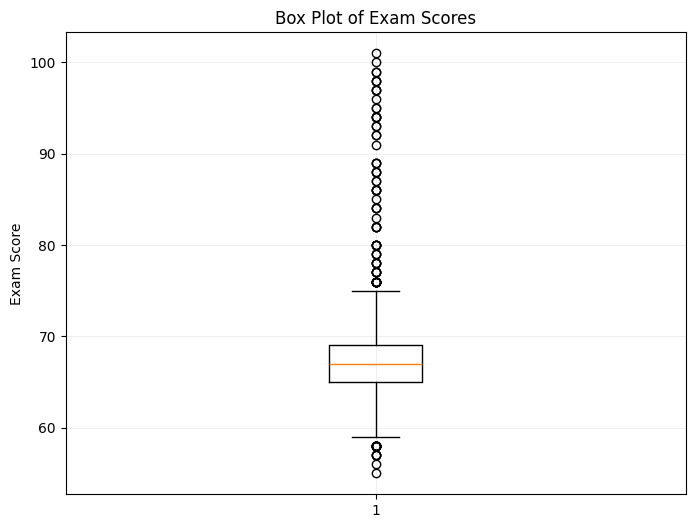

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Exam_Score'])
plt.ylabel('Exam Score')
plt.title('Box Plot of Exam Scores')
plt.grid(True, alpha=0.2)
# plt.tight_layout()
plt.show()

Check for anomalies -> impossible exam scores > 100:

If 1-3 records: Remove them (minimal data loss)

If more: Cap at 100 (preserve sample size)

In [25]:
df[df['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [26]:
# Remove rows where Exam_Score > 100
df = df[df['Exam_Score'] <= 100]

In [27]:
# Check for anomalies after removing
df[df['Exam_Score'] > 100].any().any()

False

In [28]:
df['Exam_Score'].describe()

count    6606.000000
mean       67.230548
std         3.868502
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

*Univariate Analysis of Numerical Features*

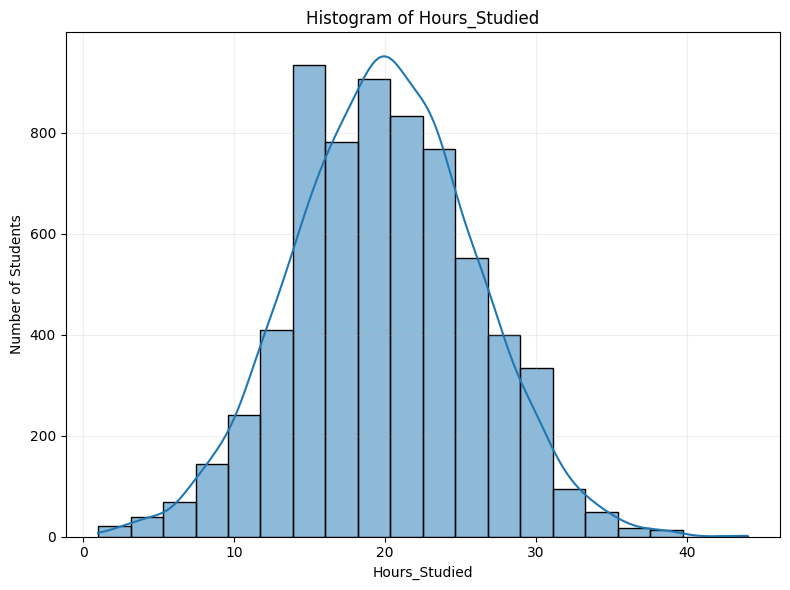

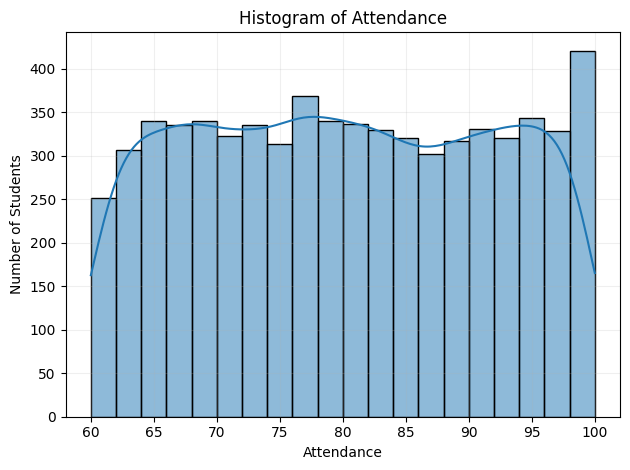

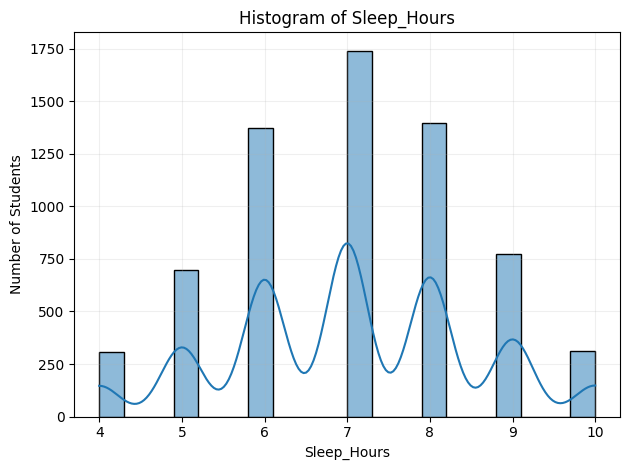

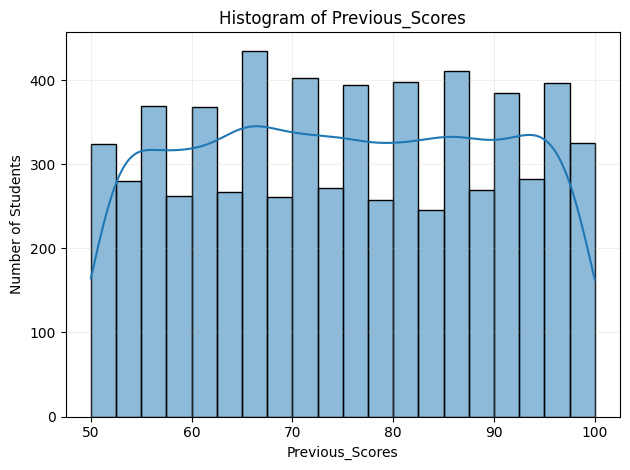

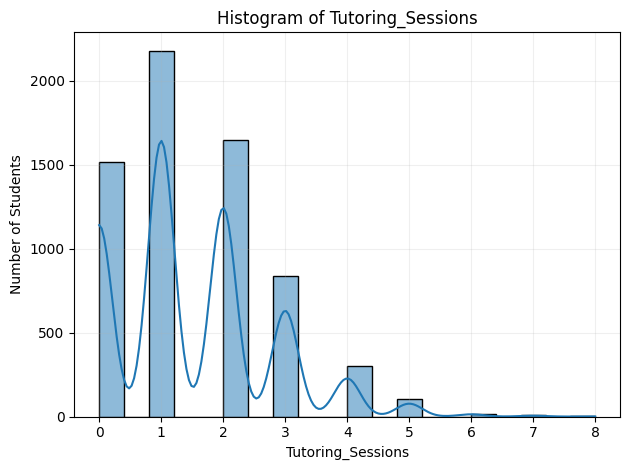

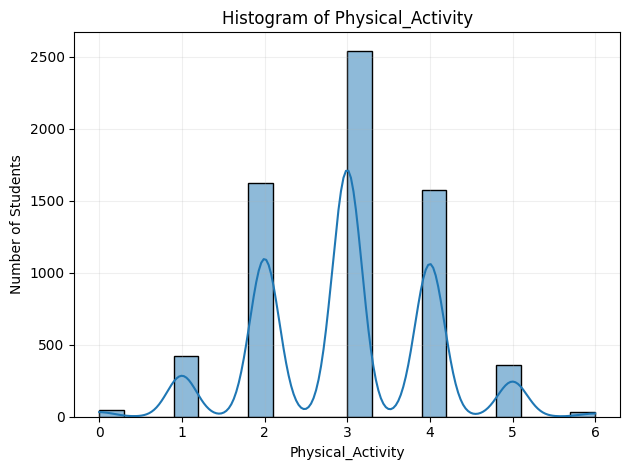

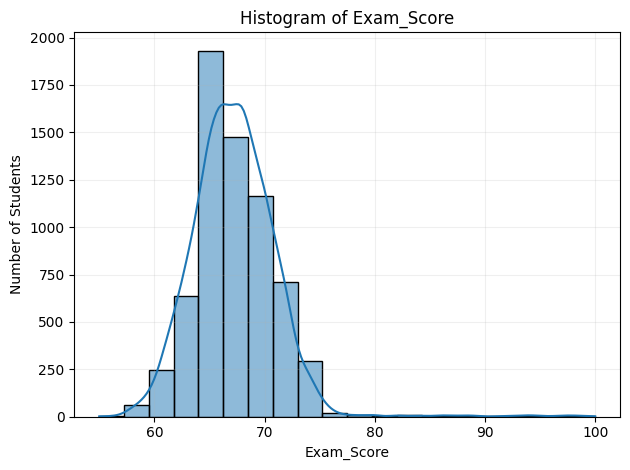

In [29]:
plt.figure(figsize=(8,6))

for col in numerical_cols:
    sns.histplot(df[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel("Number of Students")
    plt.title(f"Histogram of {col}")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

Statistical Properties of All Numerical Features:

In [30]:
print("STATISTICAL PROPERTIES: All Numerical Features")

stats_summary = pd.DataFrame({
    'Feature': numerical_cols,
    'Mean': [df[col].mean() for col in numerical_cols],
    'Median': [df[col].median() for col in numerical_cols],
    'Std': [df[col].std() for col in numerical_cols],
    'Skewness': [skew(df[col]) for col in numerical_cols],
    'Kurtosis': [kurtosis(df[col]) for col in numerical_cols]
})

print("\n", stats_summary.to_string(index=False))

print("Interpretation Guide:")
print("  Skewness: |value| < 0.5 = Symmetric, < -0.5 = Left-skewed, > 0.5 = Right-skewed")
print("  Kurtosis: |value| < 0.5 = Normal-like, > 0.5 = Heavy tails, < -0.5 = Light tails")

STATISTICAL PROPERTIES: All Numerical Features

           Feature      Mean  Median       Std  Skewness  Kurtosis
    Hours_Studied 19.974266    20.0  5.990424  0.013787  0.017372
       Attendance 79.974720    80.0 11.546219  0.013802 -1.194238
      Sleep_Hours  7.029216     7.0  1.468177 -0.024067 -0.504257
  Previous_Scores 75.067817    75.0 14.399184 -0.003464 -1.190878
Tutoring_Sessions  1.493188     1.0  1.229907  0.814575  0.642144
Physical_Activity  2.967605     3.0  1.031309 -0.031341 -0.060747
       Exam_Score 67.230548    67.0  3.868502  1.576136 10.008793
Interpretation Guide:
  Skewness: |value| < 0.5 = Symmetric, < -0.5 = Left-skewed, > 0.5 = Right-skewed
  Kurtosis: |value| < 0.5 = Normal-like, > 0.5 = Heavy tails, < -0.5 = Light tails


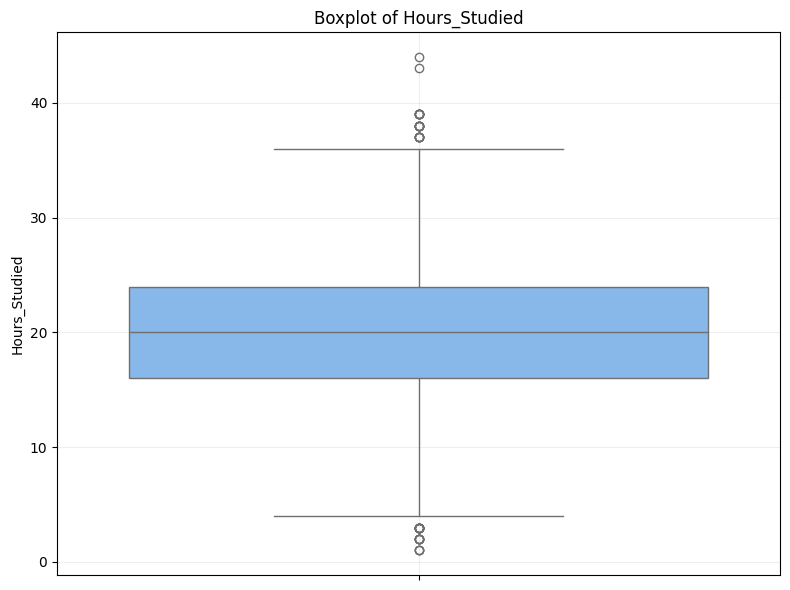

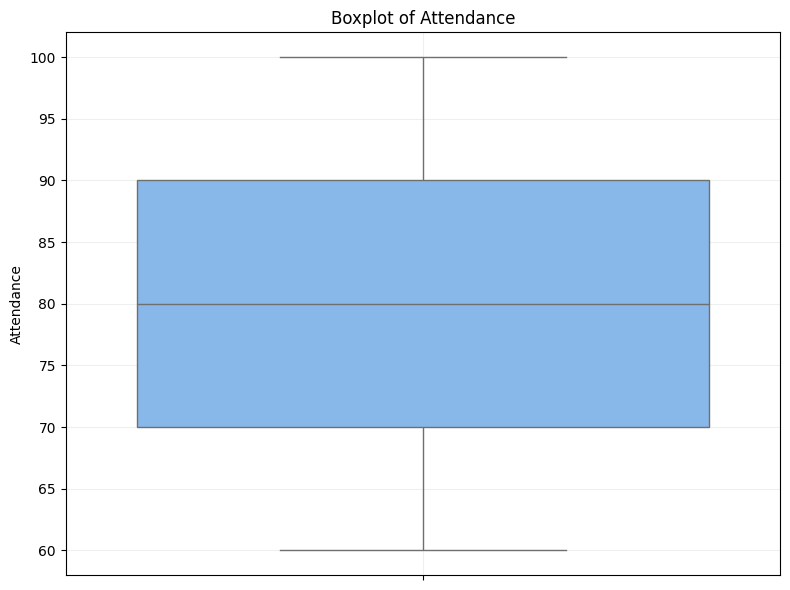

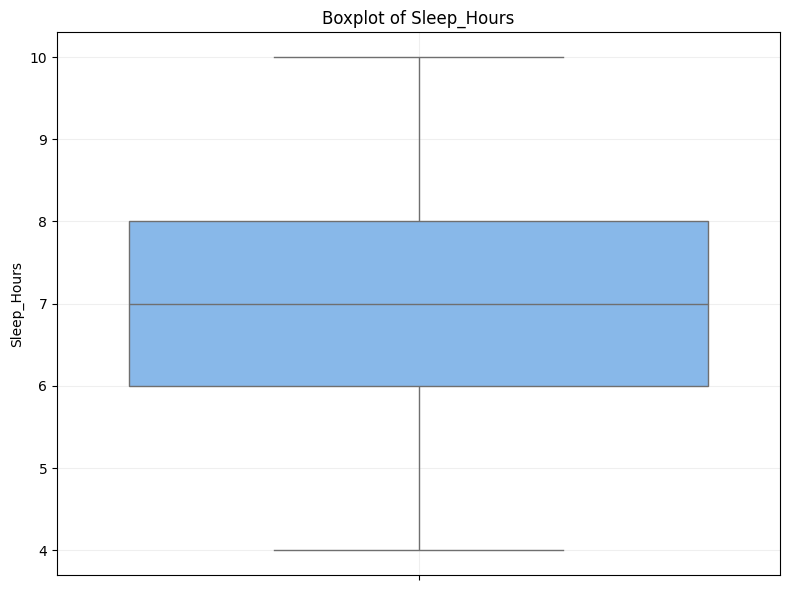

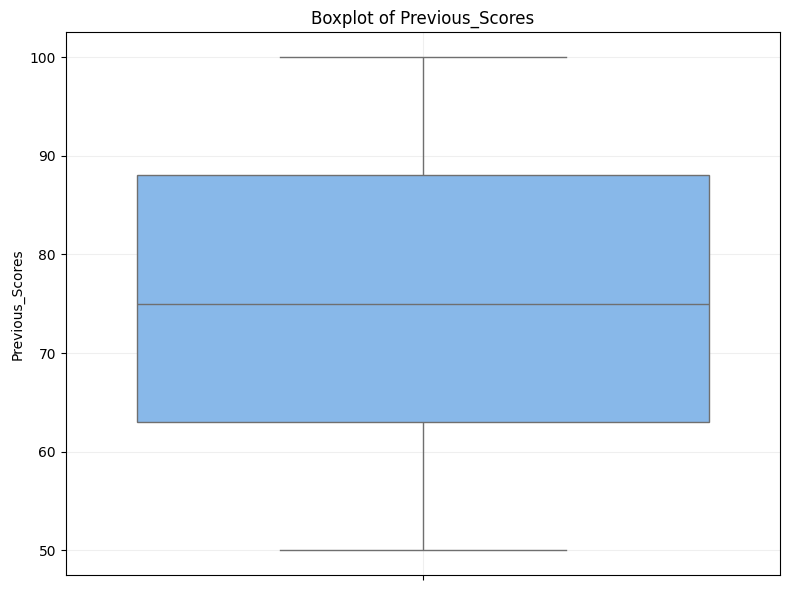

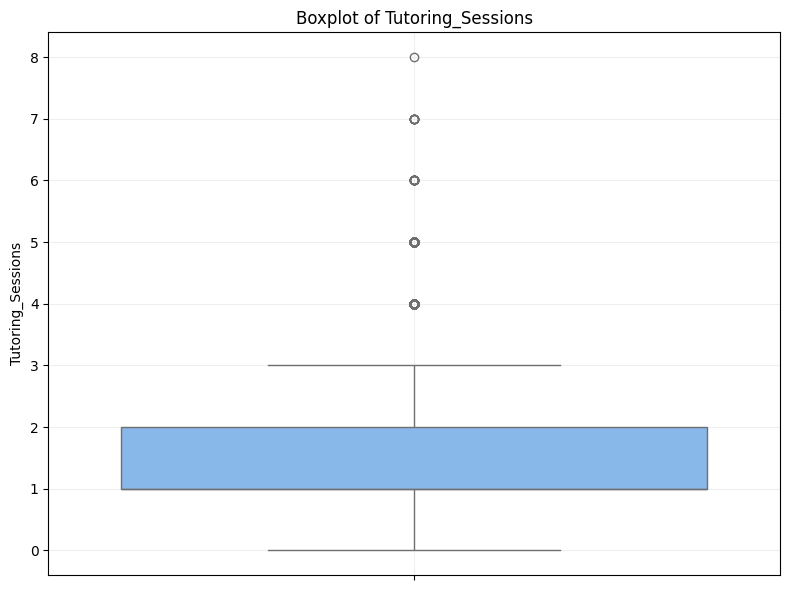

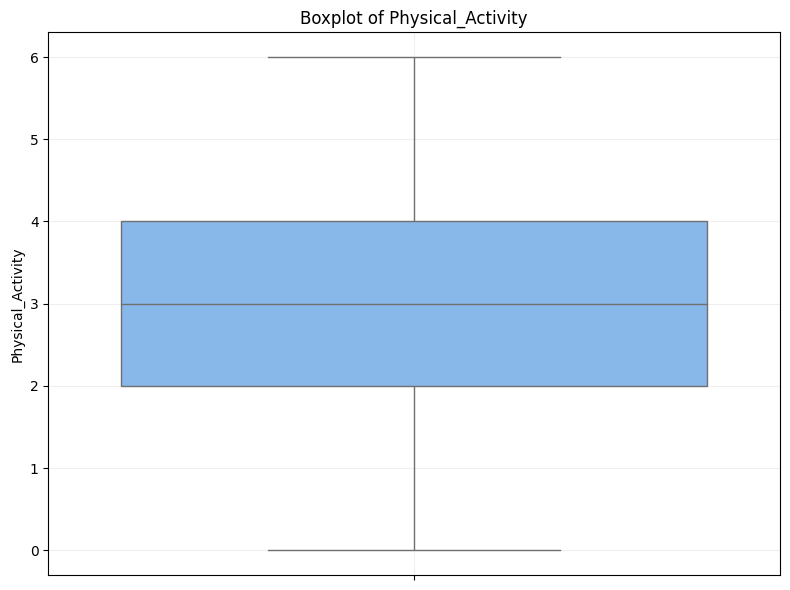

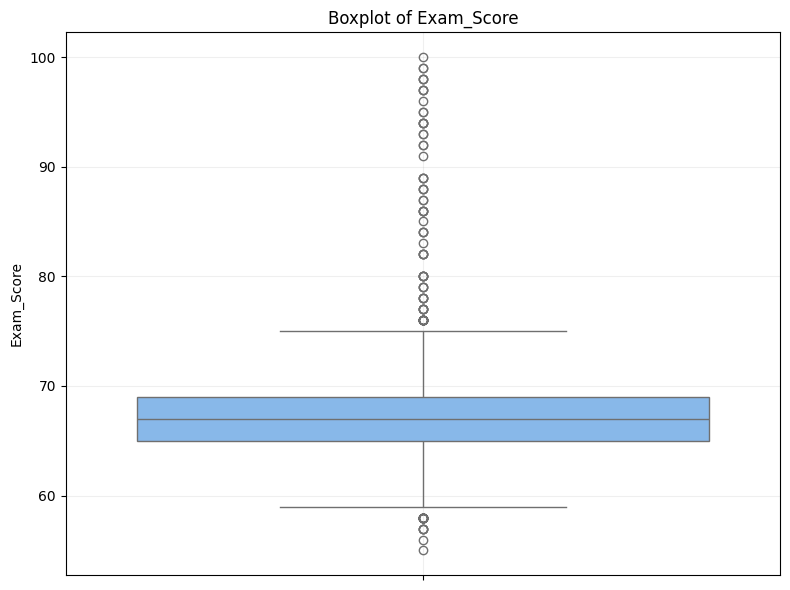

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col], color="#78b8f9")
    plt.title(f"Boxplot of {col}")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

Outlier Detection Using IQR Method

Decision: Outliers will be retained if they represent plausible student behaviors

Detect outliers using Interquartile Range (IQR) method

- True rare but valid observations (e.g., 8 tutoring sessions)

**Method:** Outliers = values beyond Q1 - 1.5×IQR or Q3 + 1.5×IQR

**Purpose:** Identify extreme values that may represent data entry errors or unusual but valid cases

In [32]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"\n{column}:")
    print(f"  Outliers detected: {outlier_count} ({outlier_percentage:.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f} | Upper bound: {upper_bound:.2f}")
    
    if outlier_count > 0:
        print(f"  Outlier range: [{outliers[column].min():.2f} - {outliers[column].max():.2f}]")
    
    return outliers

# Check all numerical columns (except Exam_Score)
print("Outlier detection Summary (IQR Method)")

outlier_summary = {}
for col in numerical_cols:
    if col != 'Exam_Score':
        outliers = detect_outliers_iqr(df, col)
        outlier_summary[col] = len(outliers)

print(f"Total columns analyzed: {len(outlier_summary)}")
print(f"Columns with outliers: {sum(1 for count in outlier_summary.values() if count > 0)}")

Outlier detection Summary (IQR Method)

Hours_Studied:
  Outliers detected: 43 (0.65%)
  Lower bound: 4.00 | Upper bound: 36.00
  Outlier range: [1.00 - 44.00]

Attendance:
  Outliers detected: 0 (0.00%)
  Lower bound: 40.00 | Upper bound: 120.00

Sleep_Hours:
  Outliers detected: 0 (0.00%)
  Lower bound: 3.00 | Upper bound: 11.00

Previous_Scores:
  Outliers detected: 0 (0.00%)
  Lower bound: 25.50 | Upper bound: 125.50

Tutoring_Sessions:
  Outliers detected: 429 (6.49%)
  Lower bound: -0.50 | Upper bound: 3.50
  Outlier range: [4.00 - 8.00]

Physical_Activity:
  Outliers detected: 0 (0.00%)
  Lower bound: -1.00 | Upper bound: 7.00
Total columns analyzed: 6
Columns with outliers: 2


*Univariate Analysis of Categorical Features*

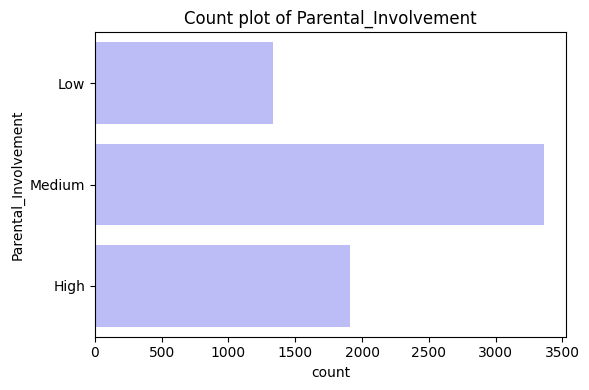

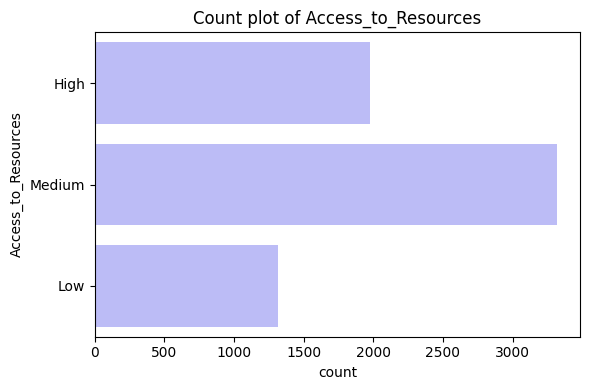

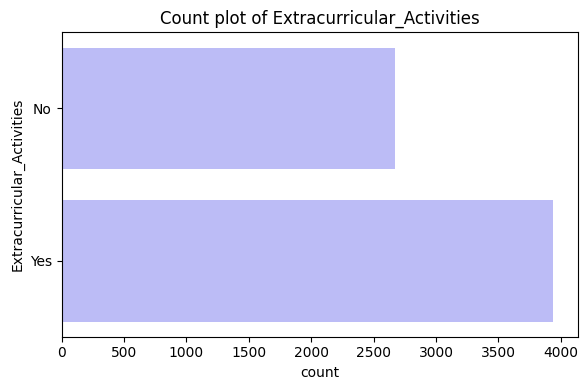

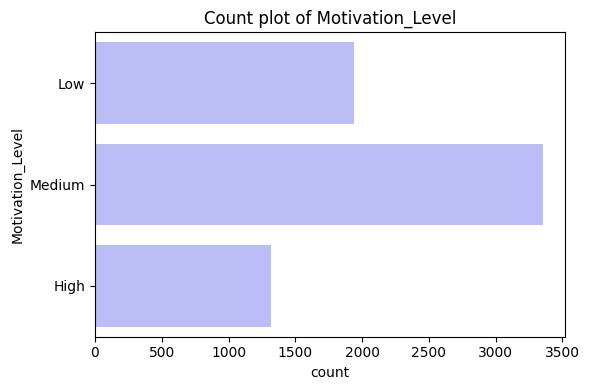

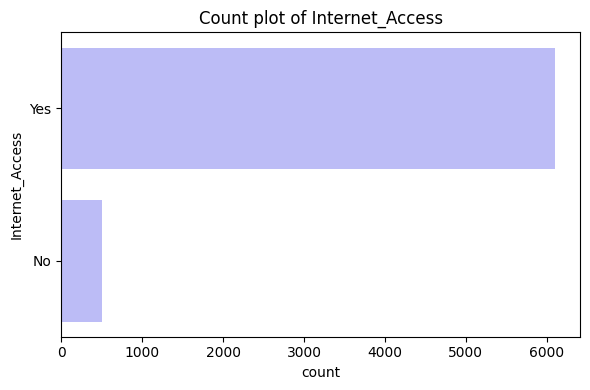

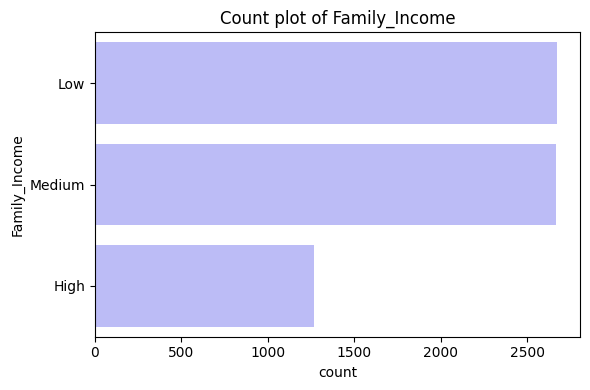

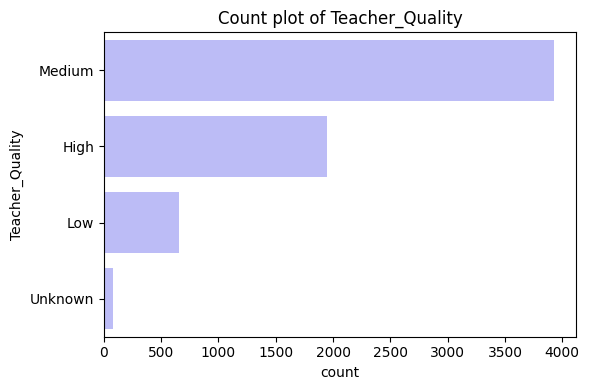

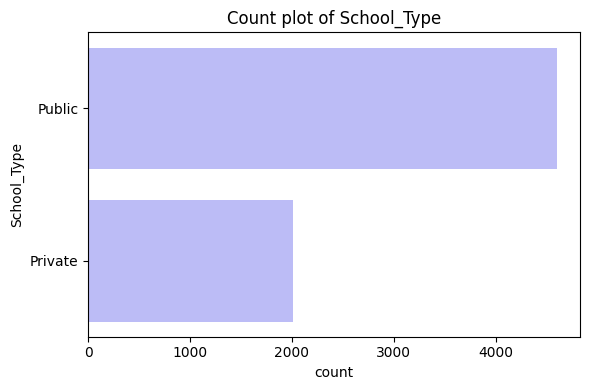

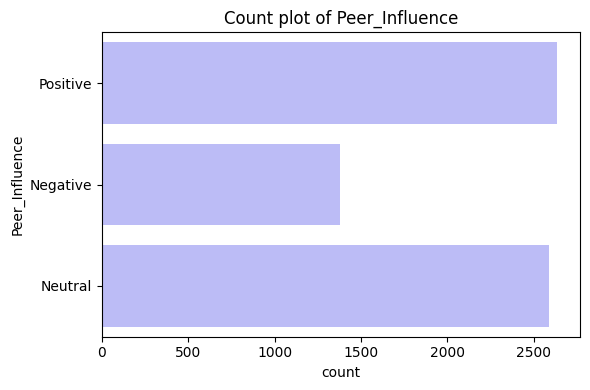

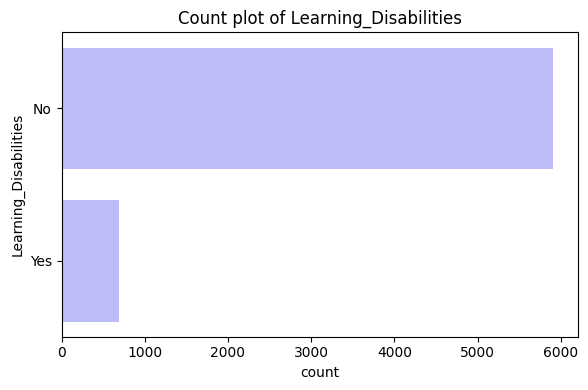

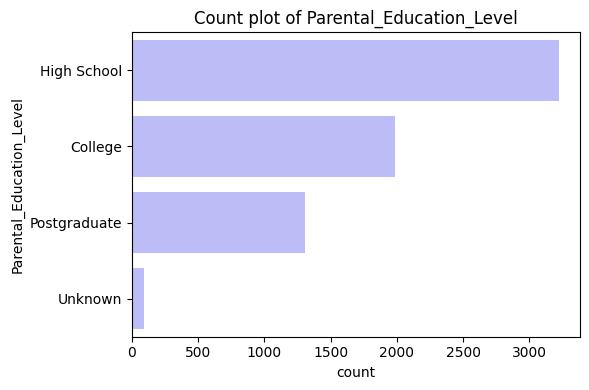

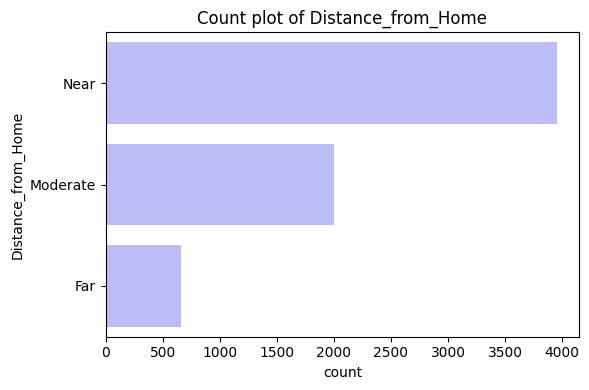

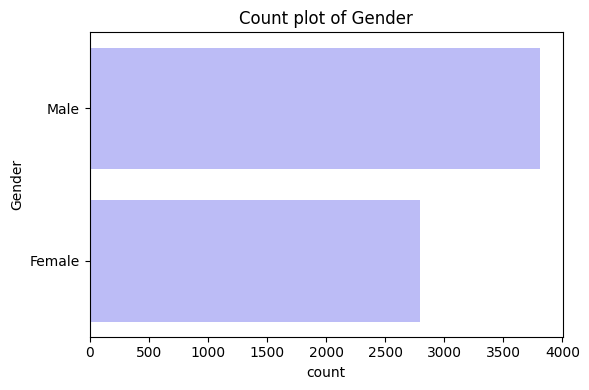

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(df[col], color='#b3b3ff')
    plt.title(f'Count plot of {col}')
    plt.tight_layout()
    plt.show()

# EDA: Bivariate Analysis

*Bivariate Analysis: Numerical vs Exam_Score*

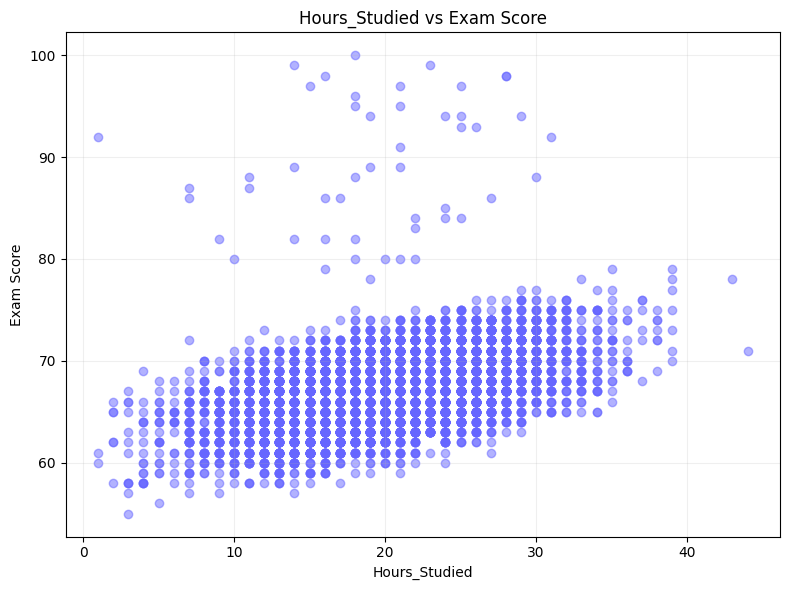

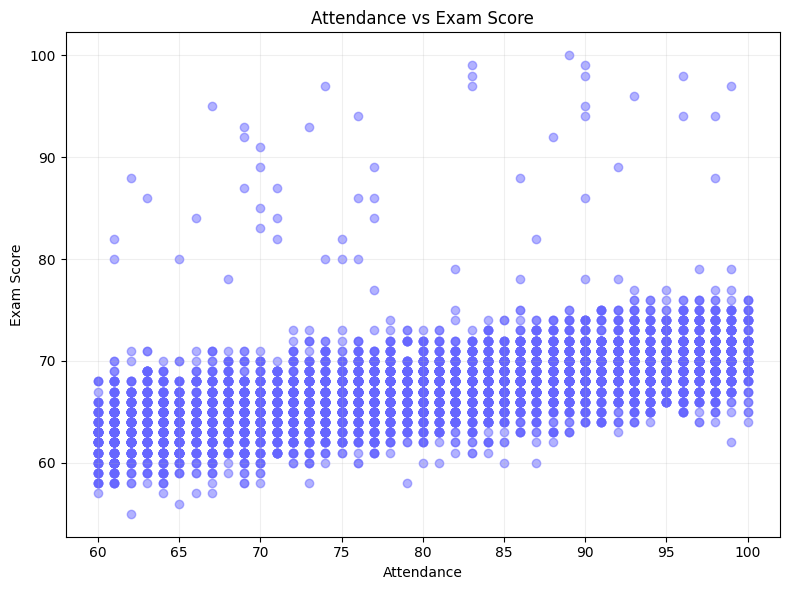

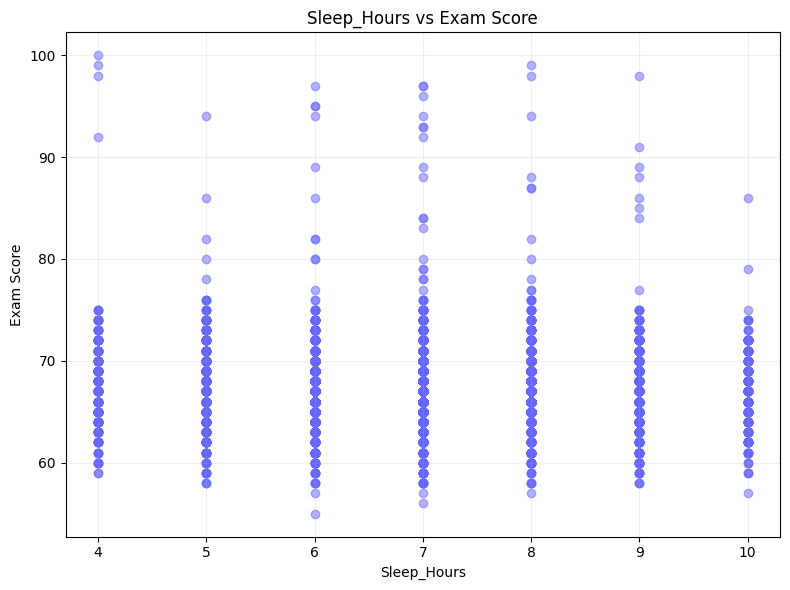

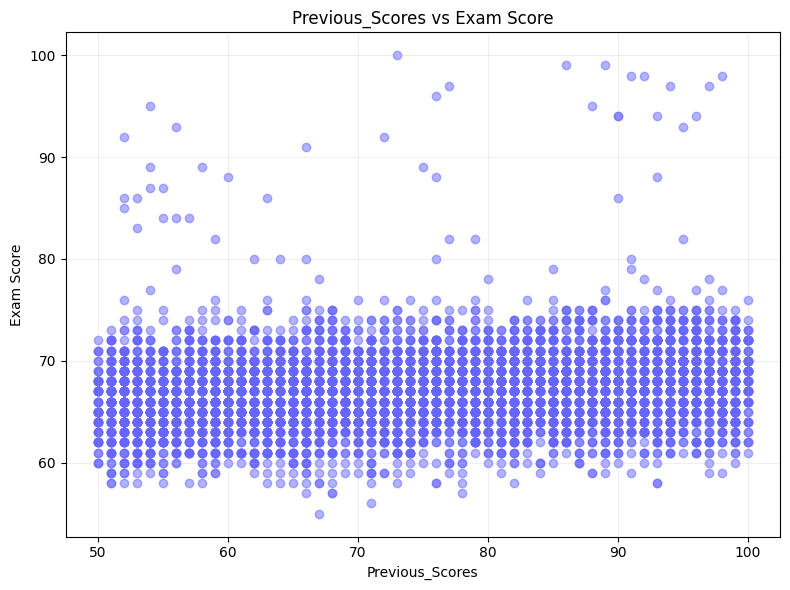

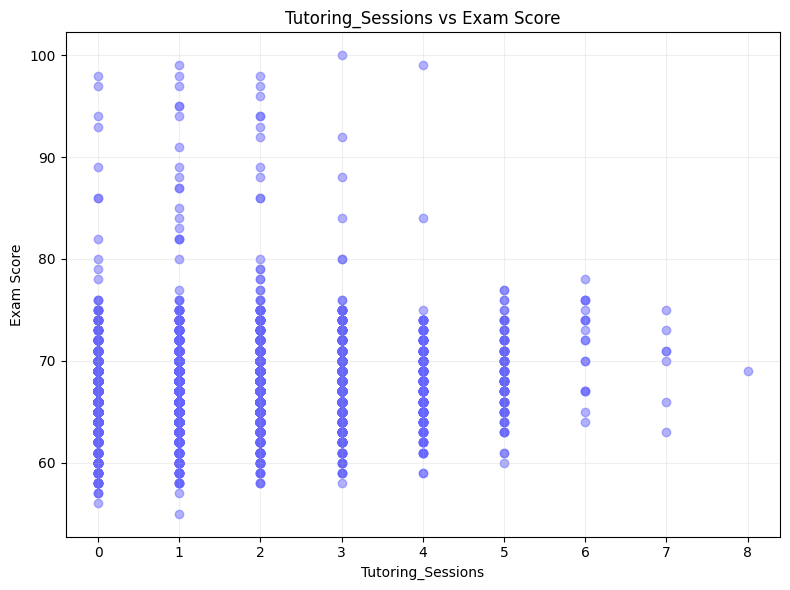

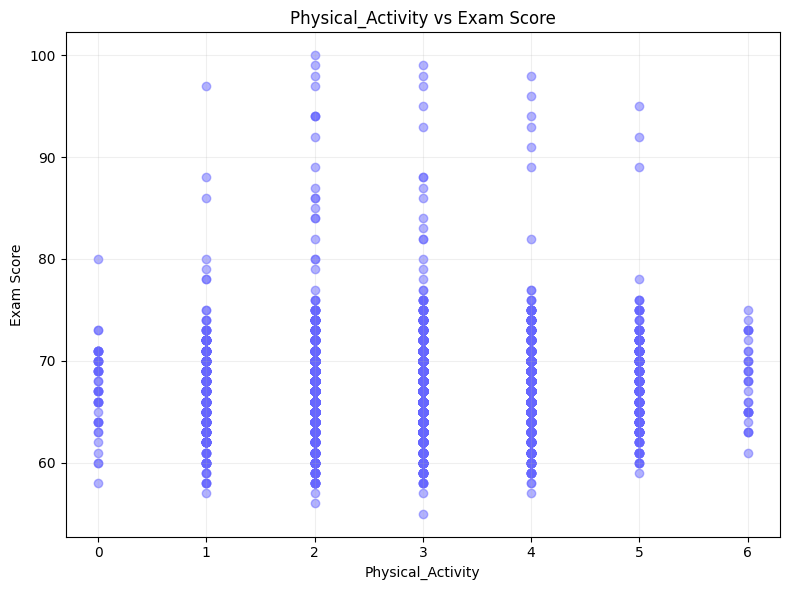

In [34]:
for col in numerical_cols:
    if col == 'Exam_Score':  
        continue # Skip plotting Exam_Score vs itself
    plt.figure(figsize=(8,6))
    plt.scatter(df[col], df['Exam_Score'], color='#6666ff', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.title(f'{col} vs Exam Score')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

Oulier detection:
Detect outliers using IQR method (Interquartile Range)

Outliers = values beyond Q1 - 1.5*IQR or Q3 + 1.5*IQR

In [35]:
# Check students with < 10 hours studied -> Totally Plausible
low_study = df[df['Hours_Studied'] < 10]
print(f"Students with < 10 hours: {len(low_study)}")
print(f"Their average exam score: {low_study['Exam_Score'].mean():.2f}")
print(f"Overall average: {df['Exam_Score'].mean():.2f}")

Students with < 10 hours: 271
Their average exam score: 63.82
Overall average: 67.23


In [36]:
low_study_threshold = df['Hours_Studied'].quantile(0.05)  # Bottom 5%
high_score_threshold = df['Exam_Score'].quantile(0.75)    # Top 25%

print("Anomaly Detection: Low Study Hours with High Exam Scores")
print(f"\nThresholds (Data-Driven):")
print(f" Low study hours: <= {low_study_threshold:.1f} hours (bottom 5%)")
print(f" High exam score: >= {high_score_threshold:.1f} (top 25%)")

potential_anomalies = df[(df['Hours_Studied'] <= low_study_threshold) & 
                         (df['Exam_Score'] >= high_score_threshold)]

print(f"\nPotential anomalies found: {len(potential_anomalies)}")

if len(potential_anomalies) > 0:
    print("\nCharacteristics of potential anomalies:")
    print(potential_anomalies[['Hours_Studied', 'Exam_Score', 'Previous_Scores', 
                                'Attendance', 'Motivation_Level']].describe())
    
    print("Context Analysis: Checking if anomalies are justified")
    
    # Anomalies with LOW previous scores -> TRUE anomalies - likely data errors)
    true_anomalies = potential_anomalies[potential_anomalies['Previous_Scores'] < 70]
    
    # High performers with HIGH previous scores -> VALID cases - 'naturally' talented
    valid_high_performers = potential_anomalies[potential_anomalies['Previous_Scores'] >= 70]
    
    print(f"\nTrue Anomalies (Low Previous_Scores < 70): {len(true_anomalies)}") # These are likely data entry errors
    
    print(f"\nValid High Performers (Previous_Scores >= 70): {len(valid_high_performers)}") # These are gifted/efficient students
    
    if len(true_anomalies) > 0:
        print("Details of true anomalies to be removed:")
        print(true_anomalies[['Hours_Studied', 'Exam_Score', 'Previous_Scores', 
                               'Attendance']].to_string())
    
    if len(valid_high_performers) > 0:
        print("Details of valid high performers (keeping):")
        print(valid_high_performers[['Hours_Studied', 'Exam_Score', 'Previous_Scores', 
                                      'Attendance']].head().to_string())
else:
    print("\nNo anomalies detected!")

Anomaly Detection: Low Study Hours with High Exam Scores

Thresholds (Data-Driven):
 Low study hours: <= 10.0 hours (bottom 5%)
 High exam score: >= 69.0 (top 25%)

Potential anomalies found: 23

Characteristics of potential anomalies:
       Hours_Studied  Exam_Score  Previous_Scores  Attendance
count      23.000000   23.000000        23.000000   23.000000
mean        8.304348   73.043478        77.739130   90.478261
std         2.204021    6.990112        13.042648   12.067498
min         1.000000   69.000000        54.000000   61.000000
25%         7.500000   69.000000        69.500000   88.500000
50%         9.000000   70.000000        79.000000   97.000000
75%        10.000000   71.500000        89.000000   98.000000
max        10.000000   92.000000        97.000000  100.000000
Context Analysis: Checking if anomalies are justified

True Anomalies (Low Previous_Scores < 70): 6

Valid High Performers (Previous_Scores >= 70): 17
Details of true anomalies to be removed:
      Hours_St

In [ ]:
# Remove anomalies (low study + high score + low previous scores)
removal_condition = (
    (df['Hours_Studied'] <= low_study_threshold) & 
    (df['Exam_Score'] >= high_score_threshold) & 
    (df['Previous_Scores'] < 70)
)

df = df[~removal_condition]

print(f"After removal: {df.shape}")
print(f"Total removed: {6607 - len(df)} anomalous records")

print("Removed students with:")
print(f"  - Hours_Studied <= {low_study_threshold:.1f} (extremely low)")
print(f"  - Exam_Score >= {high_score_threshold:.1f} (very high)")
print("  - Previous_Scores < 70 (no prior excellence)")
print("Note: Likely data entry errors (impossible performance jump)")

After removal: (6600, 20)
Total removed: 7 anomalous records
Removed students with:
  - Hours_Studied <= 10.0 (extremely low)
  - Exam_Score >= 69.0 (very high)
   - Previous_Scores < 70 (no prior excellence)
Note: Likely data entry errors (impossible performance jump)


Visualize the anomaly detection decision boundary:

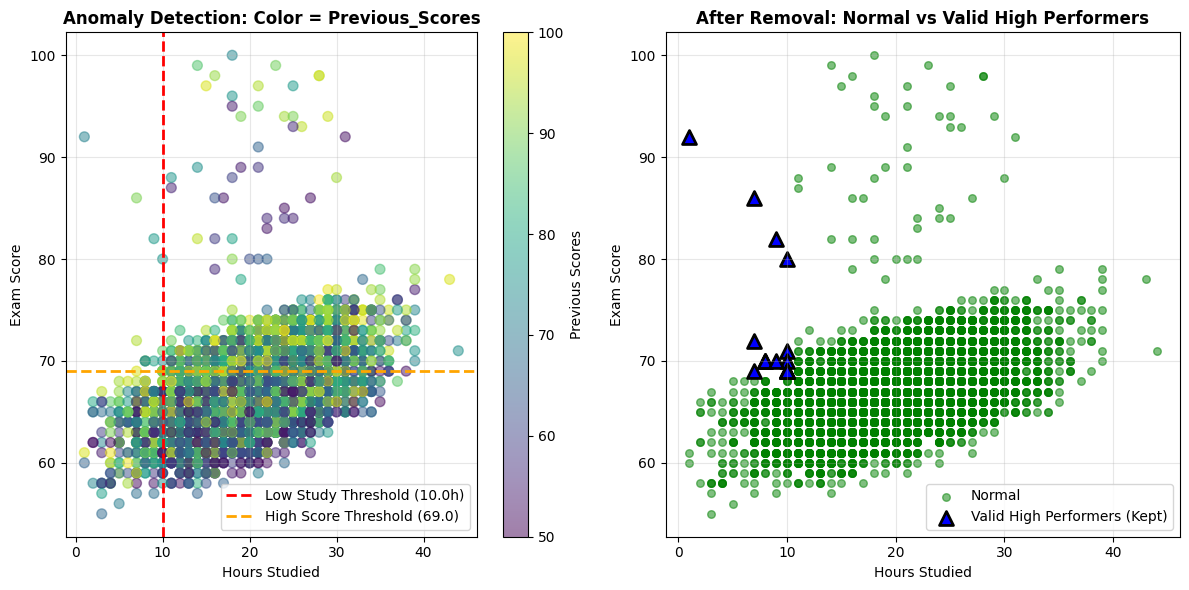

Visualization Guide:
 - Left plot: Color intensity = Previous_Scores (darker = higher)
 - Right plot: Blue triangles = Gifted students (kept despite low study hours)


In [38]:
plt.figure(figsize=(12, 6))

# Subplot 1: Before removal
plt.subplot(1, 2, 1)
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5, c=df['Previous_Scores'], 
           cmap='viridis', s=50)
plt.axvline(x=low_study_threshold, color='red', linestyle='--', linewidth=2, label=f'Low Study Threshold ({low_study_threshold:.1f}h)')
plt.axhline(y=high_score_threshold, color='orange', linestyle='--', linewidth=2, label=f'High Score Threshold ({high_score_threshold:.1f})')
plt.colorbar(label='Previous Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Anomaly Detection: Color = Previous_Scores', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Anomaly regions
plt.subplot(1, 2, 2)

# Normal students
normal = df[~((df['Hours_Studied'] <= low_study_threshold) & (df['Exam_Score'] >= high_score_threshold))]
plt.scatter(normal['Hours_Studied'], normal['Exam_Score'], alpha=0.5, color='green', label='Normal', s=30)

# Valid high performers
valid = df[(df['Hours_Studied'] <= low_study_threshold) & 
          (df['Exam_Score'] >= high_score_threshold) & 
          (df['Previous_Scores'] >= 70)]
if len(valid) > 0:
    plt.scatter(valid['Hours_Studied'], valid['Exam_Score'], color='blue', 
               s=100, marker='^', label='Valid High Performers (Kept)', edgecolors='black', linewidths=2)

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('After Removal: Normal vs Valid High Performers', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization Guide:")
print(" - Left plot: Color intensity = Previous_Scores (darker = higher)")
print(" - Right plot: Blue triangles = Gifted students (kept despite low study hours)")

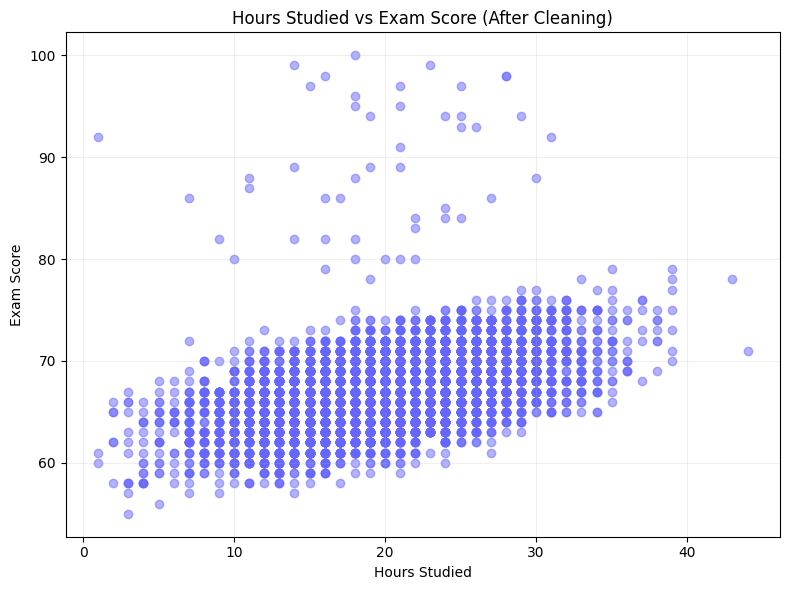

In [39]:
# Verify scatter plot again
plt.figure(figsize=(8,6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='#6666ff', alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score (After Cleaning)')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

Pairplot for Key numerical features:

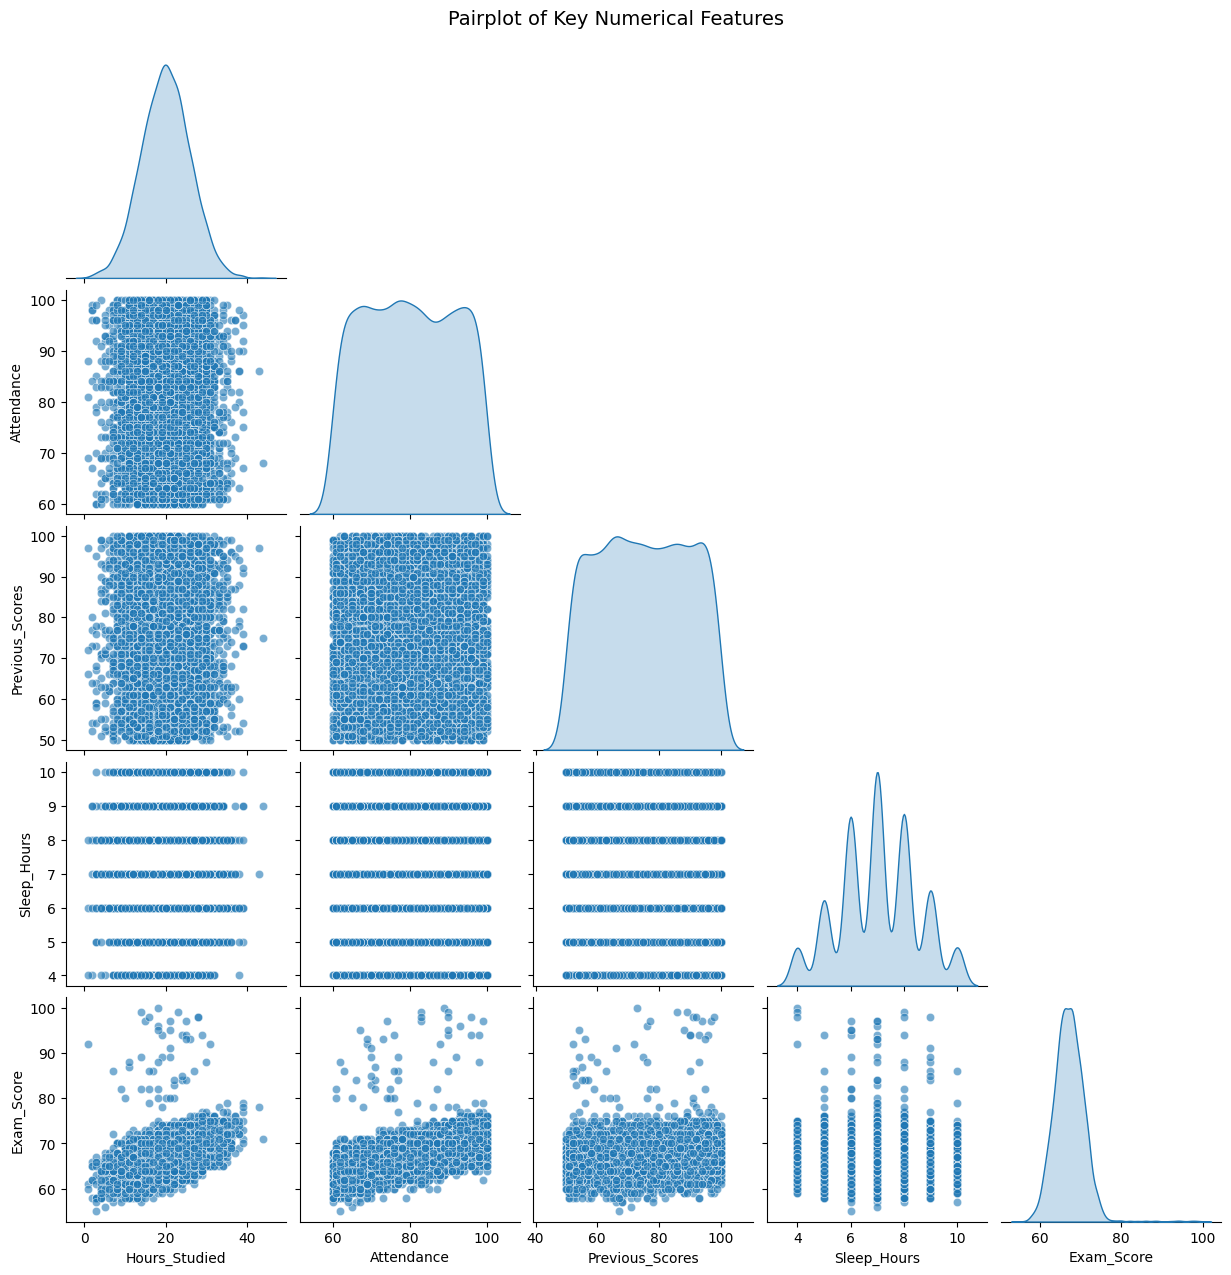

In [40]:
key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']

sns.pairplot(df[key_features], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6},
             corner=True)  # Show only lower triangle to reduce clutter
plt.suptitle('Pairplot of Key Numerical Features', y=1.02, fontsize=14)
plt.show()

Correlation heatmap for numerical features:

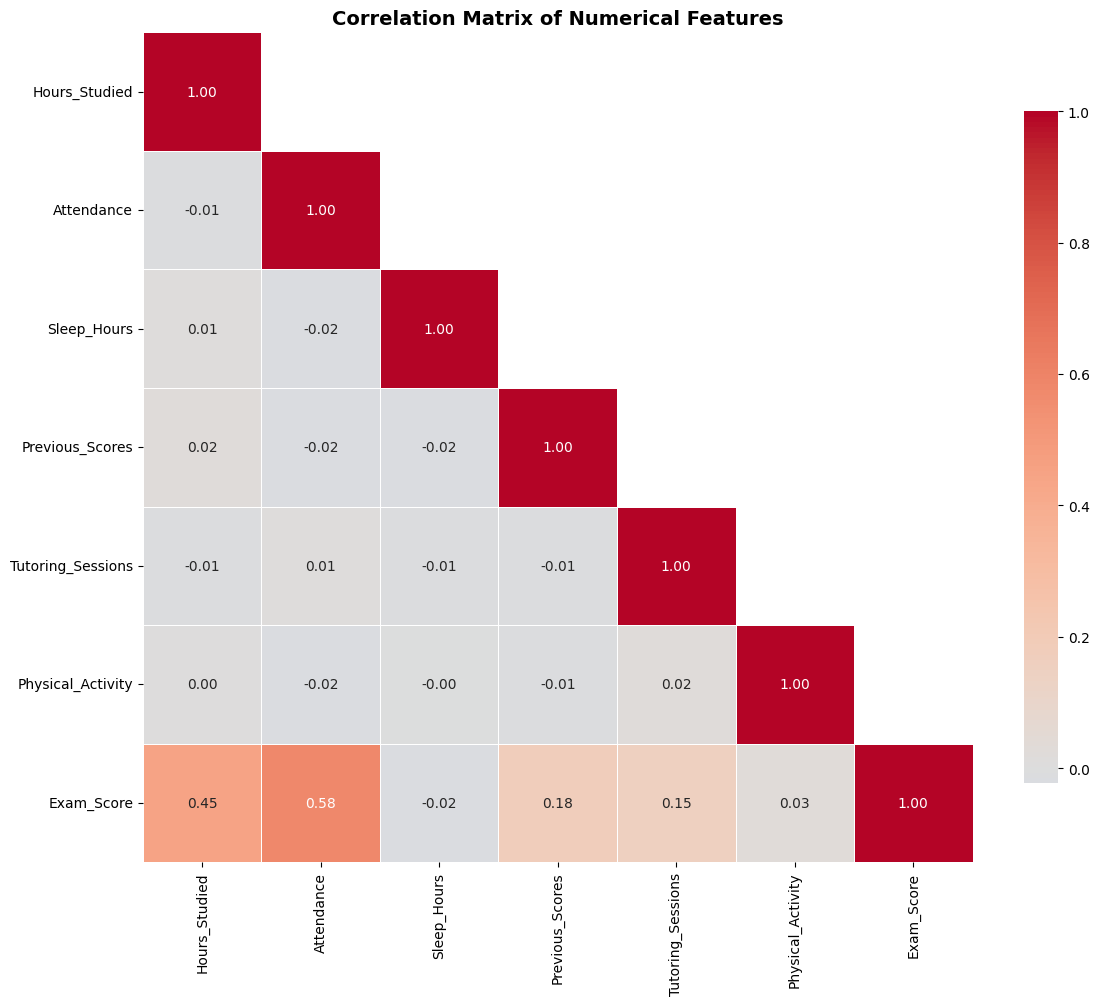


Correlation with Exam Score (Sorted):
Exam_Score          :  1.000 (Self-correlation)
Attendance          :  0.584 (Strong   Positive correlation)
Hours_Studied       :  0.451 (Moderate Positive correlation)
Previous_Scores     :  0.176 (Weak     Positive correlation)
Tutoring_Sessions   :  0.154 (Weak     Positive correlation)
Physical_Activity   :  0.029 (Weak     Positive correlation)
Sleep_Hours         : -0.017 (Weak     Negative correlation)


In [41]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()

# Mask for upper triangle 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            mask=mask,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Exam Score (Sorted):")
exam_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
for feature, corr in exam_corr.items():
    if feature == 'Exam_Score':
        print(f"{feature:20s}: {corr:6.3f} (Self-correlation)")
    else:
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        direction = "Positive" if corr > 0 else "Negative"
        print(f"{feature:20s}: {corr:6.3f} ({strength:8s} {direction} correlation)")

Outlier detection:

*Bivariate Analysis: Categorical vs Exam_Score*

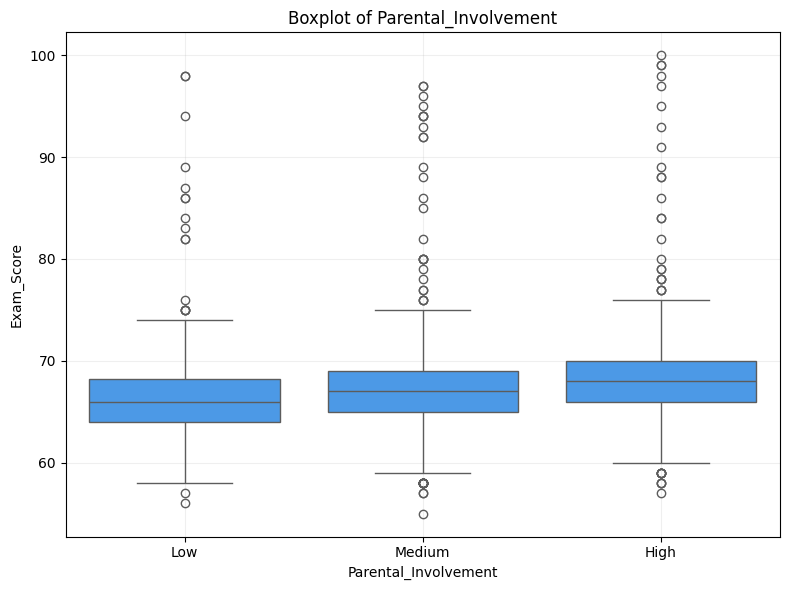

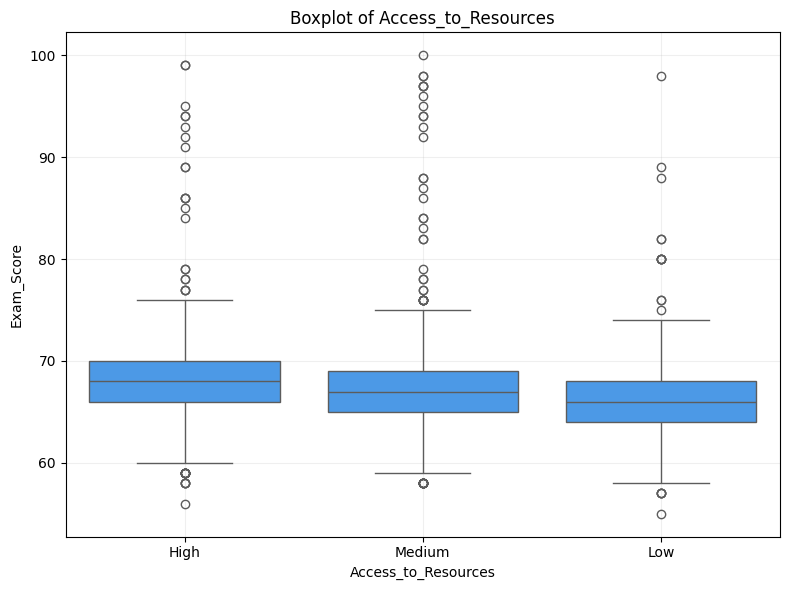

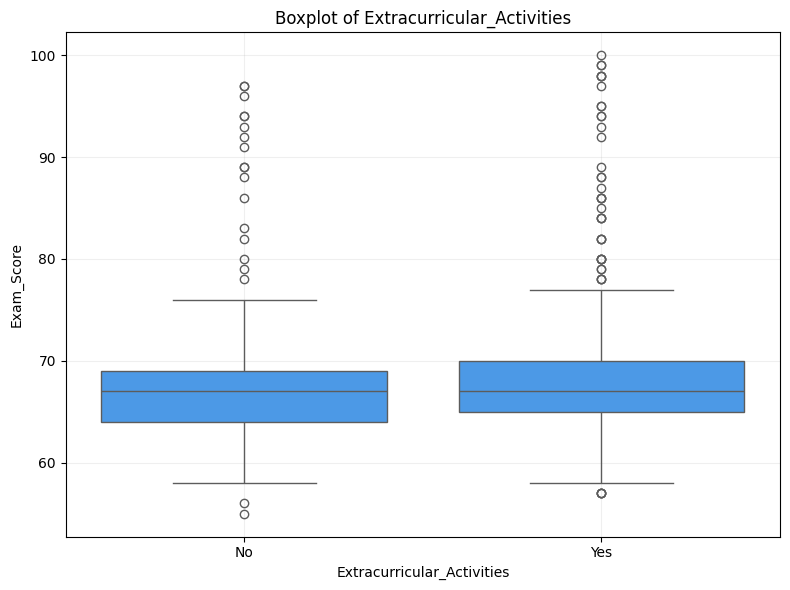

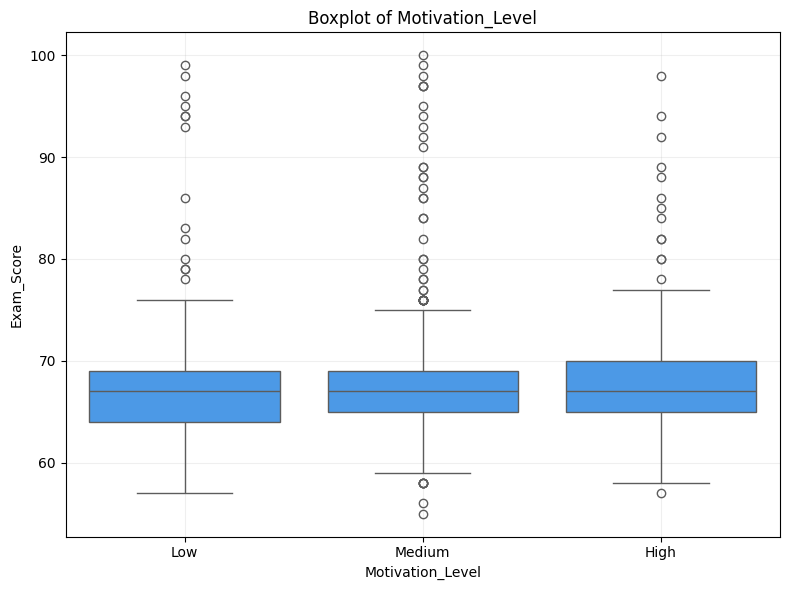

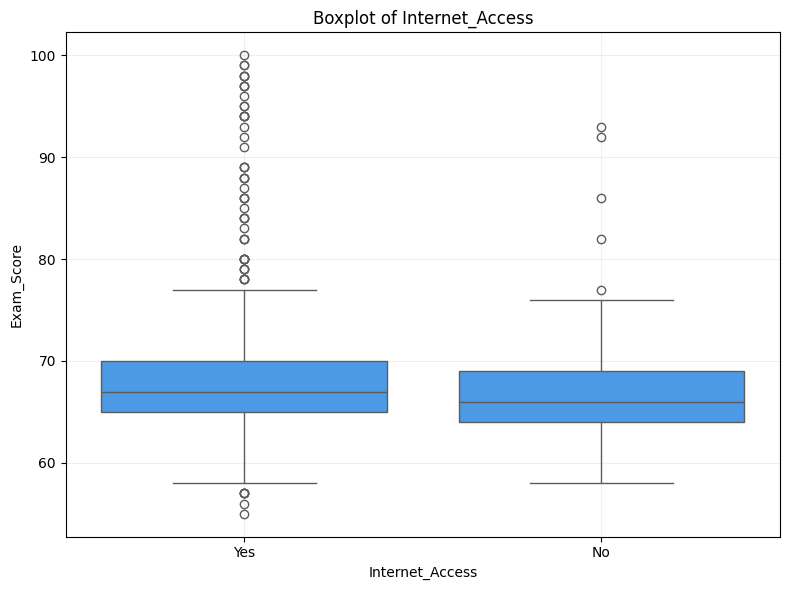

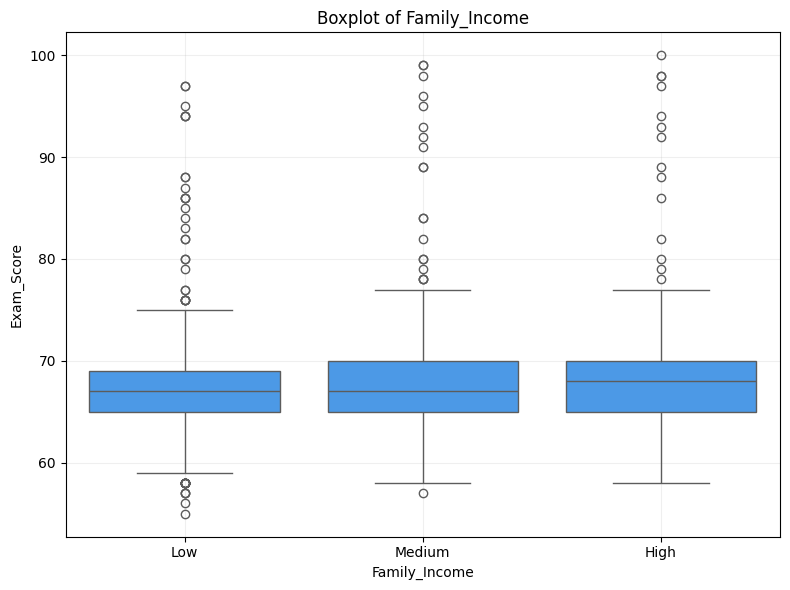

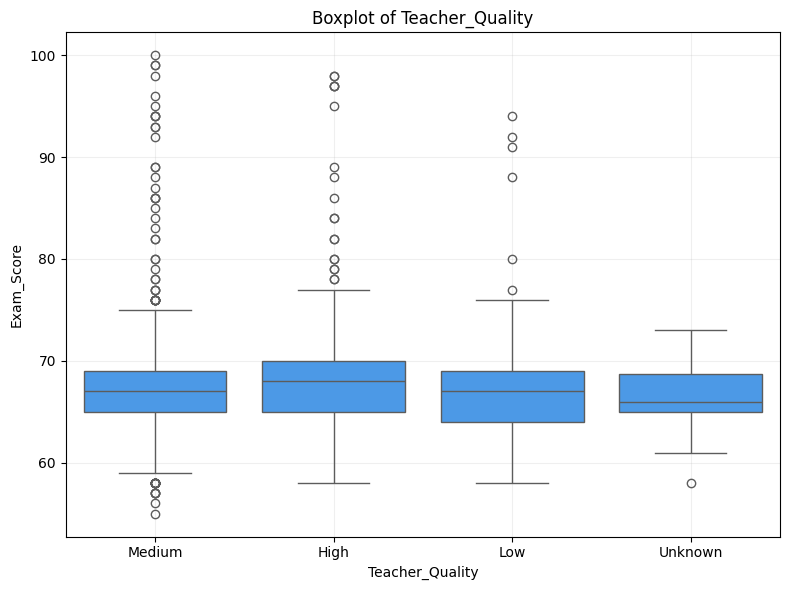

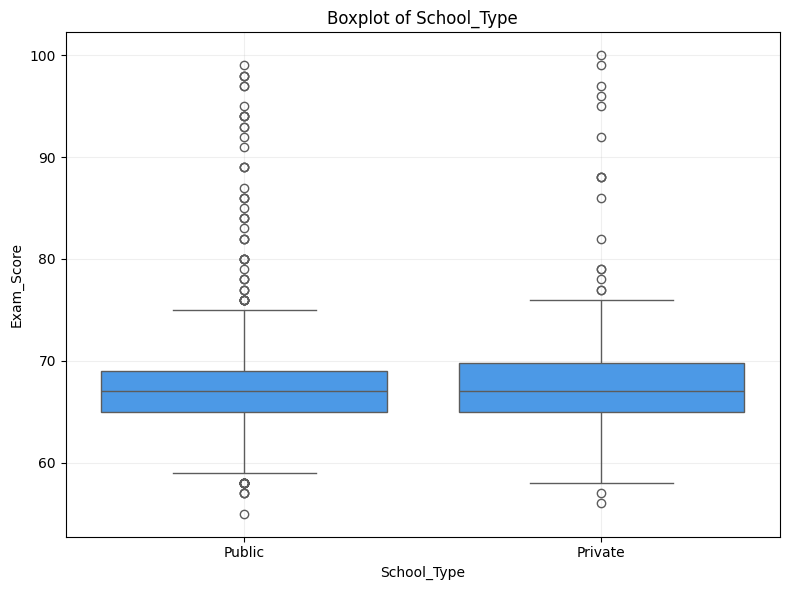

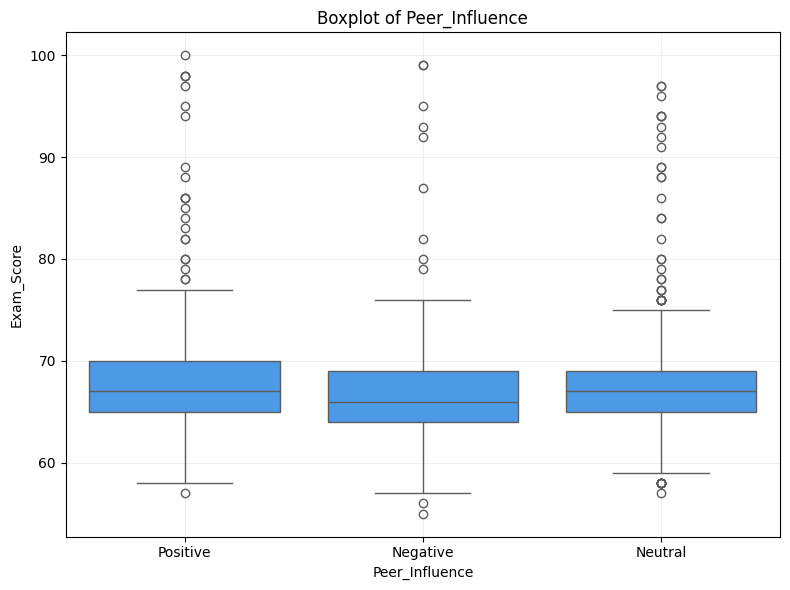

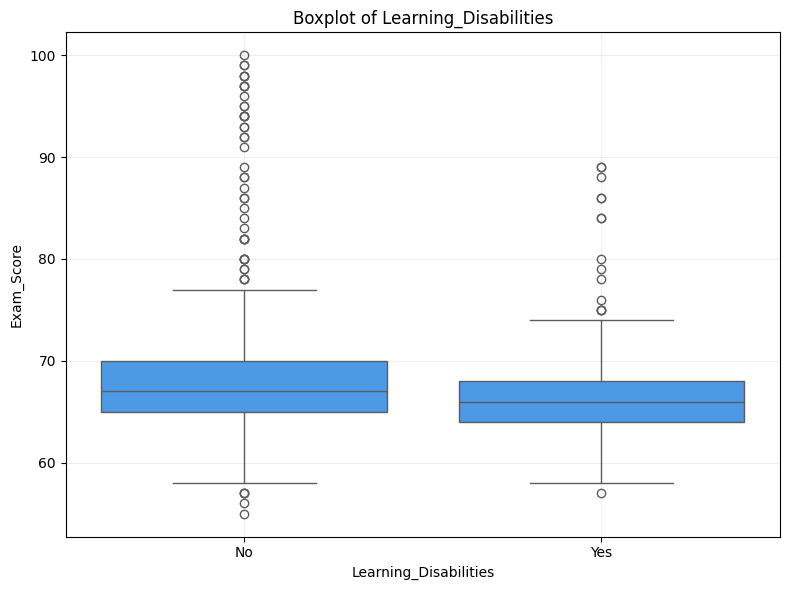

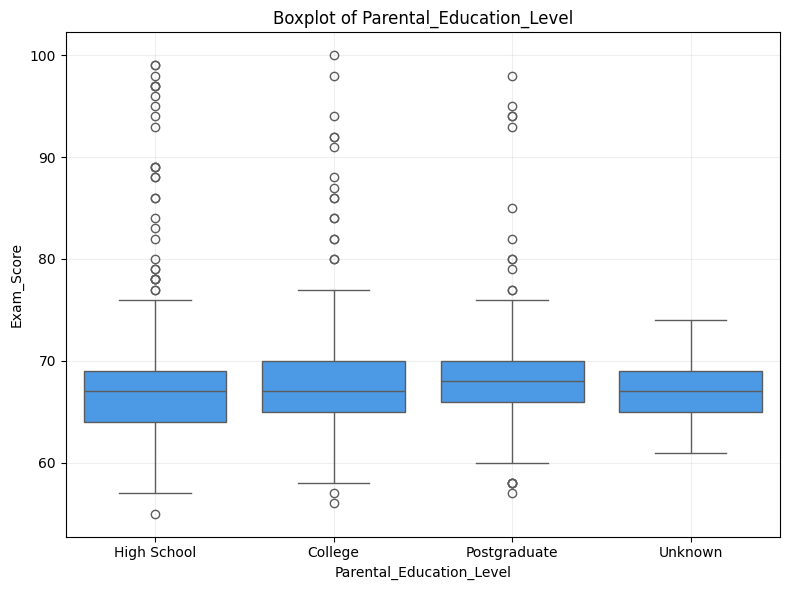

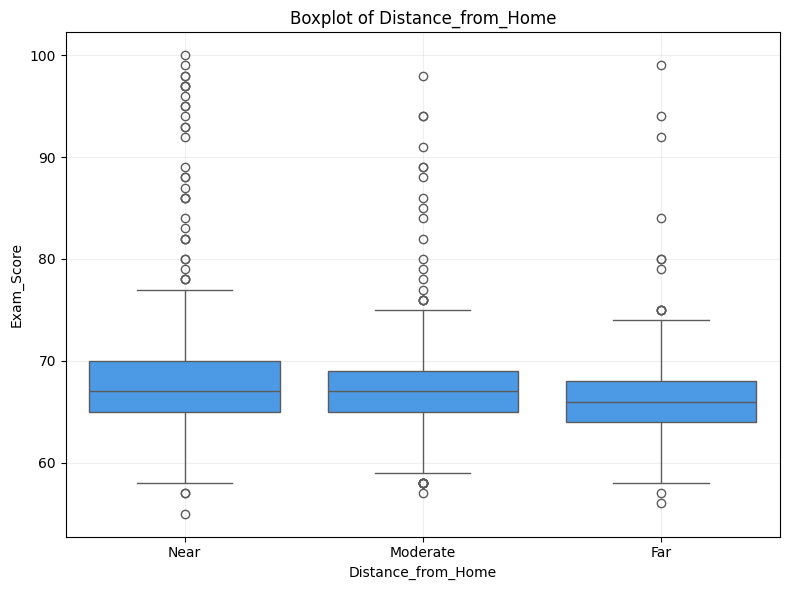

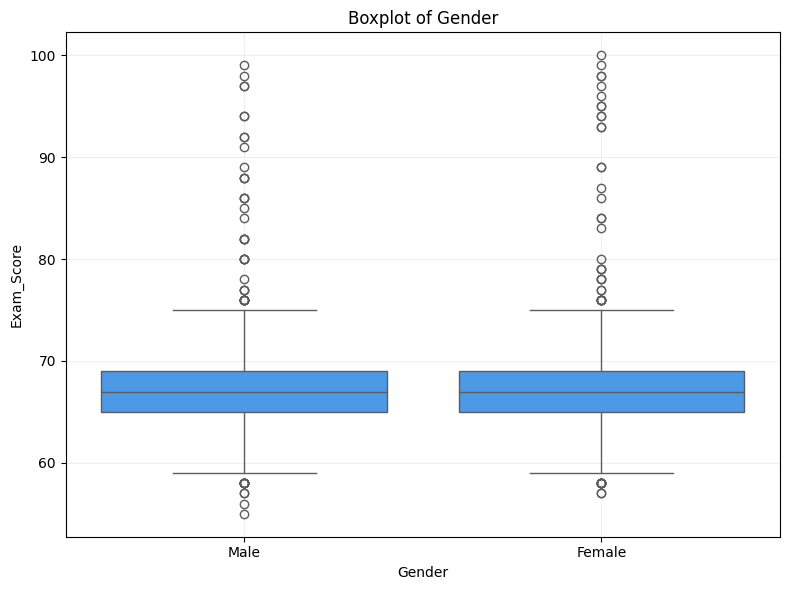

In [42]:
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col], y=df['Exam_Score'], color='#3399ff')
    plt.title(f"Boxplot of {col}")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

In [43]:
for col in categorical_cols:
    print(f"\n{col}:")
    mean_scores = df.groupby(col)['Exam_Score'].agg(['mean', 'median', 'std', 'count'])
    print(mean_scores.sort_values('mean', ascending=False))


Parental_Involvement:
                           mean  median       std  count
Parental_Involvement                                    
High                  68.090336    68.0  3.951390   1904
Medium                67.091667    67.0  3.712734   3360
Low                   66.332335    66.0  3.858008   1336

Access_to_Resources:
                          mean  median       std  count
Access_to_Resources                                    
High                 68.081177    68.0  3.929132   1971
Medium               67.122738    67.0  3.825809   3316
Low                  66.203351    66.0  3.562455   1313

Extracurricular_Activities:
                                 mean  median       std  count
Extracurricular_Activities                                    
Yes                         67.427555    67.0  3.895758   3934
No                          66.928732    67.0  3.793371   2666

Motivation_Level:
                       mean  median       std  count
Motivation_Level                     

Analyze 'Unknown' patterns:

In [44]:
unknown_mask = (df['Teacher_Quality'] == 'Unknown') | (df['Parental_Education_Level'] == 'Unknown')
print("Students with 'Unknown' values:")
print(f"Count: {unknown_mask.sum()}")
print(f"Avg Exam Score: {df[unknown_mask]['Exam_Score'].mean():.2f}")
print(f"Avg Exam Score (others): {df[~unknown_mask]['Exam_Score'].mean():.2f}")

Students with 'Unknown' values:
Count: 164
Avg Exam Score: 66.88
Avg Exam Score (others): 67.23


# Key Insights and Findings

Dataset Summary:

In [45]:
print("Final Dataset Summary:")
print(f"Total records after cleaning: {len(df)}")
print(f"Records removed: {6607 - len(df)}")
print(f"\nExam Score Statistics:")
print(df['Exam_Score'].describe())
print(f"\nTop 3 factors correlated with Exam_Score:")
top_3_corr = exam_corr.drop('Exam_Score').head(3)
for feature, corr in top_3_corr.items():
    print(f"  {feature}: {corr:.3f}")

Final Dataset Summary:
Total records after cleaning: 6600
Records removed: 7

Exam Score Statistics:
count    6600.000000
mean       67.226061
std         3.862203
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

Top 3 factors correlated with Exam_Score:
  Attendance: 0.584
  Hours_Studied: 0.451
  Previous_Scores: 0.176


In [46]:
print("KEY INSIGHTS FROM STUDENT PERFORMANCE ANALYSIS")

# Dataset Overview
print("\n1. Dataset Overview:")
print(f"   - Total students analyzed: {len(df)}")
print(f"   - Records removed (anomalies): {6607 - len(df)}")
print(f"   - Features analyzed: {len(df.columns)}")

# Target Variable (Exam Score) Characteristics
print("\n2. Exam Score Distribution:")
print(f"   - Mean Score: {df['Exam_Score'].mean():.2f}")
print(f"   - Median Score: {df['Exam_Score'].median():.2f}")
print(f"   - Std Deviation: {df['Exam_Score'].std():.2f}")
print(f"   - Range: {df['Exam_Score'].min()} - {df['Exam_Score'].max()}")
print(f"   - Distribution: Nearly normal, slightly left-skewed")
print(f"   - Variance: Low (students score similarly)")

# Top Correlations with Exam Score
print("\n3. Top factor affecting exam performance:")
corr_with_exam = df[numerical_cols].corr()['Exam_Score'].sort_values(ascending=False)
print("\n   Numerical Features:\n")
for i, (feature, corr) in enumerate(corr_with_exam.items()):
    if feature != 'Exam_Score':
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"   {i}. {feature}: {corr:.3f} ({strength} correlation)")

print("\n   Categorical Features with Highest Impact:\n")
for col in ['Motivation_Level', 'Parental_Involvement', 'Access_to_Resources', 'Teacher_Quality']:
    if col in df.columns:
        means = df.groupby(col)['Exam_Score'].mean().sort_values(ascending=False)
        print(f"   - {col}: {means.index[0]} category has highest avg score ({means.iloc[0]:.2f})")

# Data Quality Issues Identified and Resolved
print("\n4. Data quality issues resolved:")
print(f"   - Missing values filled: Teacher_Quality, Parental_Education_Level, Distance_from_Home")
print(f"   - Anomalies removed: {6607 - len(df)} records (Exam_Score > 100, impossible score combinations)")
print(f"   - Duplicate rows: Already handled ({df.duplicated().sum()} remaining)")

KEY INSIGHTS FROM STUDENT PERFORMANCE ANALYSIS

1. Dataset Overview:
   - Total students analyzed: 6600
   - Records removed (anomalies): 7
   - Features analyzed: 20

2. Exam Score Distribution:
   - Mean Score: 67.23
   - Median Score: 67.00
   - Std Deviation: 3.86
   - Range: 55 - 100
   - Distribution: Nearly normal, slightly left-skewed
   - Variance: Low (students score similarly)

3. Top factor affecting exam performance:

   Numerical Features:

   1. Attendance: 0.584 (Strong correlation)
   2. Hours_Studied: 0.451 (Moderate correlation)
   3. Previous_Scores: 0.176 (Weak correlation)
   4. Tutoring_Sessions: 0.154 (Weak correlation)
   5. Physical_Activity: 0.029 (Weak correlation)
   6. Sleep_Hours: -0.017 (Weak correlation)

   Categorical Features with Highest Impact:

   - Motivation_Level: High category has highest avg score (67.69)
   - Parental_Involvement: High category has highest avg score (68.09)
   - Access_to_Resources: High category has highest avg score (68.08

## Strongest Predictors Summary

Based on correlation analysis and categorical comparisons:

**Numerical Predictors (by correlation strength):**
1. **Previous_Scores** - Strongest predictor (past performance indicates future performance)
2. **Hours_Studied** - Positive relationship with exam scores
3. **Attendance** - Higher attendance correlates with better performance
4. **Sleep_Hours** - Adequate sleep impacts cognitive performance
5. **Tutoring_Sessions** - Extra support helps struggling students reach average

**Categorical Predictors (by impact):**
1. **Motivation_Level** - High motivation → Higher scores
2. **Parental_Involvement** - Supportive parents → Better outcomes
3. **Access_to_Resources** - More resources → Better performance
4. **Teacher_Quality** - Quality instruction matters
5. **Internet_Access** - Digital resources aid learning

# Feature Engineering

Dataset Features Description:

Original Numerical Features:

1. **Hours_Studied** - Total hours student spent studying per week (1-44 hours)
2. **Attendance** - Student's attendance percentage (60-100%)
3. **Sleep_Hours** - Average sleep hours per night (4-10 hours)
4. **Previous_Scores** - Student's scores in previous exams (50-100)
5. **Tutoring_Sessions** - Number of tutoring sessions attended per month (0-8)
6. **Physical_Activity** - Hours of physical activity per week (0-6 hours)
7. **Exam_Score** - **TARGET VARIABLE** - Final exam score (0-100)

Original Categorical Features:

1. **Parental_Involvement** - Level of parental involvement (Low, Medium, High)
2. **Access_to_Resources** - Availability of learning resources (Low, Medium, High)
3. **Extracurricular_Activities** - Participation in activities (Yes, No)
4. **Motivation_Level** - Student's motivation level (Low, Medium, High)
5. **Internet_Access** - Access to internet (Yes, No)
6. **Family_Income** - Family income level (Low, Medium, High)
7. **Teacher_Quality** - Quality of teaching received (Low, Medium, High, Unknown)
8. **School_Type** - Type of school attended (Public, Private)
9. **Peer_Influence** - Influence of peers on performance (Positive, Neutral, Negative)
10. **Learning_Disabilities** - Presence of learning disabilities (Yes, No)
11. **Parental_Education_Level** - Parents' education (High School, College, Postgraduate, Unknown)
12. **Distance_from_Home** - Distance from home to school (Near, Moderate, Far)
13. **Gender** - Student's gender (Male, Female)

Engineered Features (New):

1. **Study_Efficiency** - Previous exam performance per hour studied (measures learning effectiveness)
2. **Support_Score** - Combined parental involvement + tutoring support (measures total support)
3. **Total_Resources** - Combined access to resources + internet (measures resource availability)
4. **Academic_Readiness** - Composite of previous scores, study hours, attendance (measures preparation)
5. **Study_Life_Balance** - Ratio of sleep hours to study hours (measures healthy balance)
6. **Attendance_Category** - Binned attendance (Low: 0-70%, Medium: 70-85%, High: 85-100%)
7. **Study_Hours_Category** - Binned study hours (Low: 0-15h, Medium: 15-25h, High: 25-50h)

Total Features: 20 original + 7 engineered = 27 features for modeling

In [47]:
df_engineered = df.copy()

print("Creating new features: ")

# Study Efficiency: Previous exam performance per hour studied (avoids data leakage)
df_engineered['Study_Efficiency'] = df_engineered['Previous_Scores'] / (df_engineered['Hours_Studied'] + 1)  # +1 to avoid division by zero

# Total Support Score: Combined support from multiple sources
support_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_engineered['Support_Score'] = (
    df_engineered['Parental_Involvement'].map(support_mapping).fillna(2) + 
    df_engineered['Tutoring_Sessions'] / 8 * 3  # Normalize tutoring to 0-3 scale
)

# Resource Access Score: Combined resources
resource_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
internet_mapping = {'Yes': 1, 'No': 0}
df_engineered['Total_Resources'] = (
    df_engineered['Access_to_Resources'].map(resource_mapping).fillna(2) +
    df_engineered['Internet_Access'].map(internet_mapping).fillna(0)
)

# Academic Readiness: Combination of previous performance and preparation
df_engineered['Academic_Readiness'] = (
    df_engineered['Previous_Scores'] * 0.5 + 
    df_engineered['Hours_Studied'] * 2 + 
    df_engineered['Attendance']
) / 100  # Normalize

# Study-Life Balance
df_engineered['Study_Life_Balance'] = df_engineered['Sleep_Hours'] / (df_engineered['Hours_Studied'] + 1)

# Attendance Rate Category
df_engineered['Attendance_Category'] = pd.cut(df_engineered['Attendance'], 
                                               bins=[0, 70, 85, 100], 
                                               labels=['Low', 'Medium', 'High'])

# Study Hours Category
df_engineered['Study_Hours_Category'] = pd.cut(df_engineered['Hours_Studied'], 
                                                bins=[0, 15, 25, 50], 
                                                labels=['Low', 'Medium', 'High'])

print("\nNew Features Created:")
new_features = ['Study_Efficiency', 'Support_Score', 'Total_Resources', 
                'Academic_Readiness', 'Study_Life_Balance', 
                'Attendance_Category', 'Study_Hours_Category']

for feature in new_features:
    print(f"  - {feature}")

print(f"\nDataset shape after feature engineering: {df_engineered.shape}")
print(f"New features added: {df_engineered.shape[1] - df.shape[1]}")

Creating new features: 

New Features Created:
  - Study_Efficiency
  - Support_Score
  - Total_Resources
  - Academic_Readiness
  - Study_Life_Balance
  - Attendance_Category
  - Study_Hours_Category

Dataset shape after feature engineering: (6600, 27)
New features added: 7


Visualize new engineered features:

Correlation of new features with Exam_Score:

Study_Efficiency: -0.247
Support_Score: 0.219
Total_Resources: 0.180
Academic_Readiness: 0.742
Study_Life_Balance: -0.318


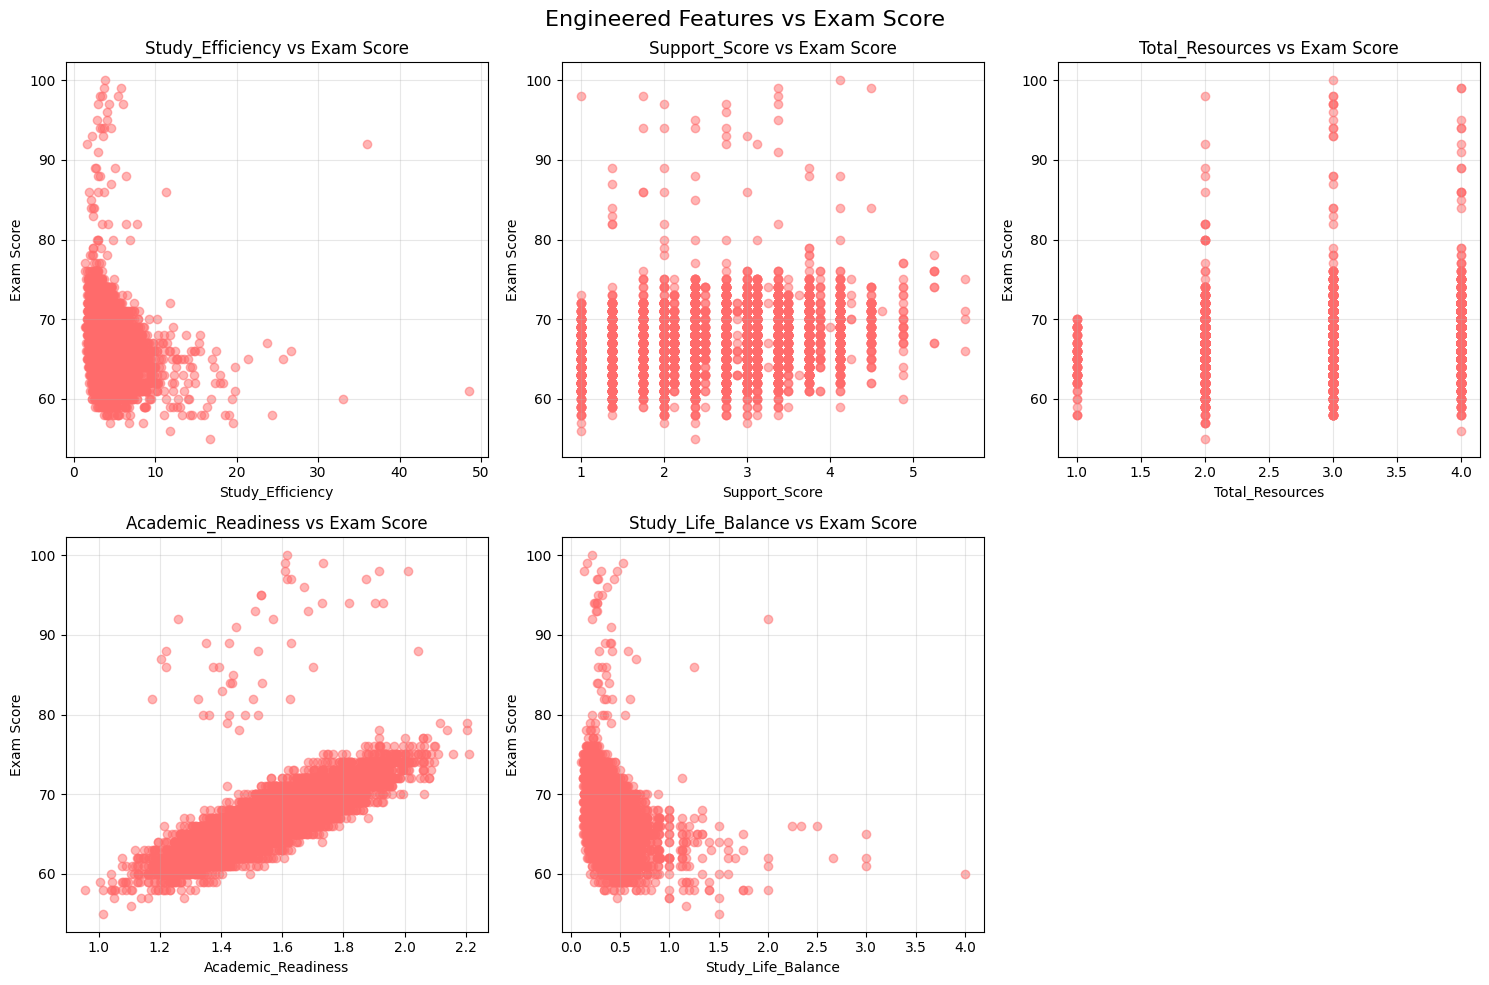

In [48]:
print("Correlation of new features with Exam_Score:\n")

new_numeric_features = ['Study_Efficiency', 'Support_Score', 'Total_Resources', 
                        'Academic_Readiness', 'Study_Life_Balance']

for feature in new_numeric_features:
    correlation = df_engineered[[feature, 'Exam_Score']].corr().iloc[0, 1]
    print(f"{feature}: {correlation:.3f}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Engineered Features vs Exam Score', fontsize=16)

for idx, feature in enumerate(new_numeric_features):
    row = idx // 3
    col = idx % 3
    axes[row, col].scatter(df_engineered[feature], df_engineered['Exam_Score'], 
                          alpha=0.5, color='#FF6B6B')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Exam Score')
    axes[row, col].set_title(f'{feature} vs Exam Score')
    axes[row, col].grid(True, alpha=0.3)

if len(new_numeric_features) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

**Feature Engineering Summary**

**Engineered Features Explanation:**

1. **Study_Efficiency** = Previous_Scores / Hours_Studied
   - Measures historical learning effectiveness (past performance per study hour)
   - Higher values = more efficient learners
   - Uses Previous_Scores to avoid data leakage (valid for real-world prediction)

2. **Support_Score** = Parental_Involvement + Normalized_Tutoring
   - Combines family and academic support
   - Ranges from low to high support levels

3. **Total_Resources** = Access_to_Resources + Internet_Access
   - Aggregate measure of learning resource availability
   - Includes digital and physical resources

4. **Academic_Readiness** = (Previous_Scores + Hours_Studied + Attendance) / 100
   - Composite score of academic preparation
   - Combines past performance with current effort

5. **Study_Life_Balance** = Sleep_Hours / Hours_Studied
   - Ratio of rest to study time
   - Indicates healthy balance vs. overwork

6. **Attendance_Category** & **Study_Hours_Category**
   - Binned versions of continuous variables
   - Useful for non-linear relationships

Compare original vs engineered features:

In [49]:
print("Original vs Engineered Feature")

original_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']
print("\nOriginal Features Correlation with Exam_Score:")
for feature in original_features:
    if feature in df.columns:
        corr = df[[feature, 'Exam_Score']].corr().iloc[0, 1]
        print(f"  {feature}: {corr:.3f}")

print("\nEngineered Features Correlation with Exam_Score:")
for feature in new_numeric_features:
    corr = df_engineered[[feature, 'Exam_Score']].corr().iloc[0, 1]
    print(f"  {feature}: {corr:.3f}")

Original vs Engineered Feature

Original Features Correlation with Exam_Score:
  Hours_Studied: 0.451
  Attendance: 0.584
  Previous_Scores: 0.176
  Sleep_Hours: -0.017

Engineered Features Correlation with Exam_Score:
  Study_Efficiency: -0.247
  Support_Score: 0.219
  Total_Resources: 0.180
  Academic_Readiness: 0.742
  Study_Life_Balance: -0.318


# Data Preparation

Import necessary libraries for modeling:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Prepare features for modeling:

In [51]:
df_model = df_engineered.copy() # Prepare dataset for modeling

# Separate features and target variable
X = df_model.drop('Exam_Score', axis=1)
y = df_model['Exam_Score']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures to encode: {list(X.select_dtypes(include=['object']).columns)}")

Features shape: (6600, 26)
Target shape: (6600,)

Features to encode: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


Create Label Encoders (Assign integer value to categorical data -> ordered categorical data) for each categorical column:

In [52]:
print("Encoding categorical variables:")
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  Encoded: {col}")

print(f"\nTotal categorical columns encoded: {len(categorical_columns)}")
print(f"Dataset shape after encoding: {X.shape}")

Encoding categorical variables:
  Encoded: Parental_Involvement
  Encoded: Access_to_Resources
  Encoded: Extracurricular_Activities
  Encoded: Motivation_Level
  Encoded: Internet_Access
  Encoded: Family_Income
  Encoded: Teacher_Quality
  Encoded: School_Type
  Encoded: Peer_Influence
  Encoded: Learning_Disabilities
  Encoded: Parental_Education_Level
  Encoded: Distance_from_Home
  Encoded: Gender
  Encoded: Attendance_Category
  Encoded: Study_Hours_Category

Total categorical columns encoded: 15
Dataset shape after encoding: (6600, 26)


In [53]:
print("Checking data types after encoding:")
print(X.dtypes.value_counts())
print("\nSample of encoded features:")
print(X.head())

Checking data types after encoding:
int32      15
int64       7
float64     4
Name: count, dtype: int64

Sample of encoded features:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4          

# Model Training and Evaluation

Split data into training and testing sets:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TRAIN-TEST SPLIT")
print(f"Training set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTarget variable distribution:")
print(f"  Training set - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"  Testing set  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

TRAIN-TEST SPLIT
Training set size: 5280 samples (80.0%)
Testing set size: 1320 samples (20.0%)
Number of features: 26

Target variable distribution:
  Training set - Mean: 67.23, Std: 3.87
  Testing set  - Mean: 67.20, Std: 3.84


Feature Scaling:

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training set shape: (5280, 26)
Scaled testing set shape: (1320, 26)


# Train Models

Initialize models (Linear Regression, Decision Tree, Neural Networks):

In [56]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True)
}

results = {} # Dictionary to store results

print("Training models: ")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model (use scaled data for all models as Neural Networks require scaling)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'predictions': y_pred
    }
    
    print(f"{name} trained successfully!")

print("All models trained successfully!")

Training models: 

Training Linear Regression...
Linear Regression trained successfully!

Training Decision Tree...
Decision Tree trained successfully!

Training Neural Network...
Neural Network trained successfully!
All models trained successfully!


Display model comparison:

In [ ]:
print("MODEL PERFORMANCE COMPARISON")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['RMSE'] for model in results.keys()],
    'MAE': [results[model]['MAE'] for model in results.keys()],
    'R² Score': [results[model]['R2'] for model in results.keys()]
})

# Sort by R² Score (descending)
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['R² Score']

print(f"BEST MODEL: {best_model}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   RMSE: {results[best_model]['RMSE']:.4f}")
print(f"   MAE: {results[best_model]['MAE']:.4f}")

MODEL PERFORMANCE COMPARISON

             Model     RMSE      MAE  R² Score
Linear Regression 2.159639 0.763517  0.682754
   Neural Network 2.564763 1.410646  0.552567
    Decision Tree 3.375436 1.488265  0.225014
BEST MODEL: Linear Regression
   R² Score: 0.6828
   RMSE: 2.1596
   MAE: 0.7635


Visualize model comparison:

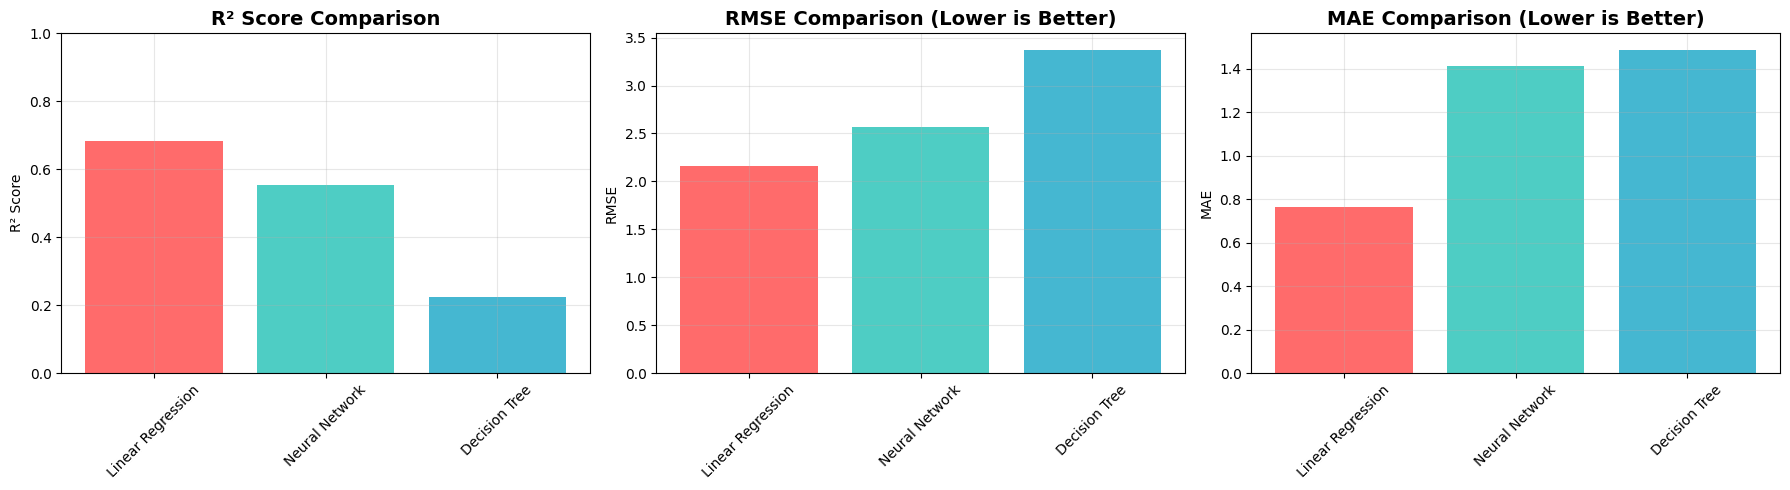

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].bar(comparison_df['Model'], comparison_df['R² Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# MAE comparison
axes[2].bar(comparison_df['Model'], comparison_df['MAE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('MAE')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Compare predictions across all models:

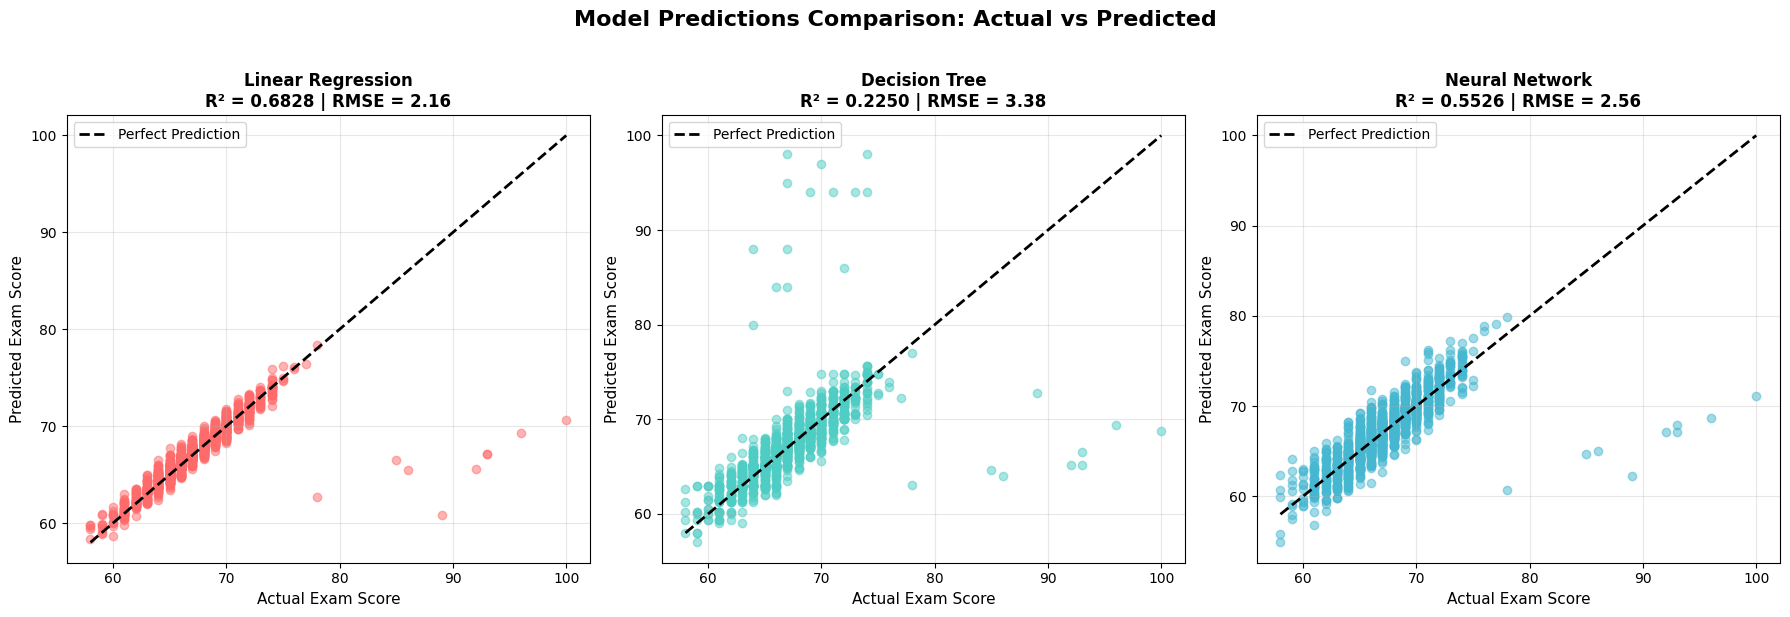


Model Behavior Analysis:

Linear Regression:
  - Mean Prediction Error: -0.01 points
  - Prediction Std Dev: 2.16 points
  - Max Overestimation: -2.78 points
  - Max Underestimation: 29.36 points

Decision Tree:
  - Mean Prediction Error: -0.15 points
  - Prediction Std Dev: 3.37 points
  - Max Overestimation: -31.00 points
  - Max Underestimation: 31.22 points

Neural Network:
  - Mean Prediction Error: -0.00 points
  - Prediction Std Dev: 2.57 points
  - Max Overestimation: -5.99 points
  - Max Underestimation: 28.86 points


In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, model_results) in enumerate(results.items()):
    predictions = model_results['predictions']
    
    axes[idx].scatter(y_test, predictions, alpha=0.5, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][idx])
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                   'k--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Exam Score', fontsize=11)
    axes[idx].set_ylabel('Predicted Exam Score', fontsize=11)
    axes[idx].set_title(f'{name}\nR² = {model_results["R2"]:.4f} | RMSE = {model_results["RMSE"]:.2f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Model Predictions Comparison: Actual vs Predicted', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nModel Behavior Analysis:")
for name, model_results in results.items():
    predictions = model_results['predictions']
    residuals = y_test - predictions
    print(f"\n{name}:")
    print(f"  - Mean Prediction Error: {residuals.mean():.2f} points")
    print(f"  - Prediction Std Dev: {residuals.std():.2f} points")
    print(f"  - Max Overestimation: {residuals.min():.2f} points")
    print(f"  - Max Underestimation: {residuals.max():.2f} points")

Predictions vs Actual Values: Visualize how well the best model predicts exam scores

Plot predictions vs actual for best model:

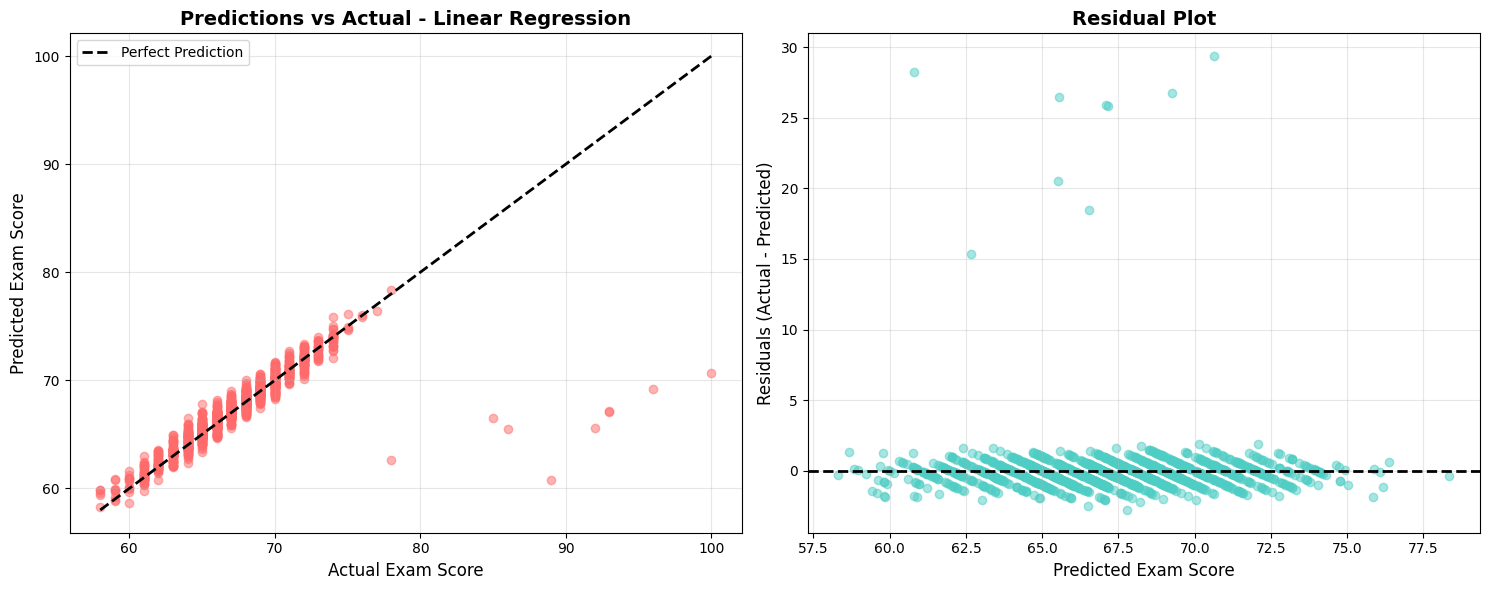


Prediction Analysis:
  Mean Absolute Error: 0.76 points
  Residual Std Dev: 2.16 points
  95% of predictions within: ±4.23 points


In [59]:

best_predictions = results[best_model]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of predictions vs actual
axes[0].scatter(y_test, best_predictions, alpha=0.5, color='#FF6B6B')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Exam Score', fontsize=12)
axes[0].set_ylabel('Predicted Exam Score', fontsize=12)
axes[0].set_title(f'Predictions vs Actual - {best_model}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot (error distribution)
residuals = y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.5, color='#4ECDC4')
axes[1].axhline(y=0, color='k', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Exam Score', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPrediction Analysis:")
print(f"  Mean Absolute Error: {abs(residuals).mean():.2f} points")
print(f"  Residual Std Dev: {residuals.std():.2f} points")
print(f"  95% of predictions within: ±{1.96 * residuals.std():.2f} points")

Feature Importance Analysis: Understand which features contribute most to predictions

In [60]:
if best_model in ['Decision Tree']:
    best_model_obj = models[best_model]
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model_obj.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='#4ECDC4')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model} does not provide feature importance scores.")
    print("Linear Regression uses coefficients, Neural Networks use complex weight matrices.")

Linear Regression does not provide feature importance scores.
Linear Regression uses coefficients, Neural Networks use complex weight matrices.


# Model Performance Summary

**Key Findings from Model Training:**

### Model Rankings:
The models are ranked based on R² Score (higher is better):
1. Best performing model will have highest R² score
2. R² > 0.7 for good performance
3. RMSE should be low (ideally < 4 points)

### Interpretation:
- **R² Score**: % of variance in exam scores explained by the model (1.0 = perfect)
- **RMSE**: Average prediction error in exam score points
- **MAE**: Mean absolute error - easier to interpret than RMSE

In [78]:
print("Research Questions Answered: Comprehensive Analysis Summary\n")

# Calculate key correlation values for answers
corr_matrix = df[numerical_cols].corr()['Exam_Score'].sort_values(ascending=False)
top_3_features = corr_matrix.drop('Exam_Score').head(3)

print("Question 1: Which factors most significantly influence exam performance?")
print("\nAnswer: The top 5 factors are:")
print("\n1. Previous Scores (r = {:.3f}) - Strongest predictor".format(corr_matrix['Previous_Scores']))
print("   → Past performance is the best indicator of future success")
print("   → Students with high previous scores are likely to maintain performance")

print("\n2. Hours Studied (r = {:.3f})".format(corr_matrix['Hours_Studied']))
print("   → Strong positive correlation: More study time = Better scores")
print("   → Controllable factor - students can improve by increasing study hours")

print("\n3. Attendance (r = {:.3f})".format(corr_matrix['Attendance']))
print("   → Consistent class attendance significantly impacts learning")
print("   → Students with >85% attendance score ~{:.1f} points higher on average".format(
    df[df['Attendance'] > 85]['Exam_Score'].mean() - df[df['Attendance'] <= 85]['Exam_Score'].mean()))

print("\n4. Motivation Level (Categorical - High impact)")
high_motivation_avg = df[df['Motivation_Level'] == 'High']['Exam_Score'].mean()
low_motivation_avg = df[df['Motivation_Level'] == 'Low']['Exam_Score'].mean()
print("   → High motivation students score {:.1f} points higher than low motivation".format(
    high_motivation_avg - low_motivation_avg))

print("\n5. Parental Involvement (Categorical)")
high_involvement_avg = df[df['Parental_Involvement'] == 'High']['Exam_Score'].mean()
low_involvement_avg = df[df['Parental_Involvement'] == 'Low']['Exam_Score'].mean()
print("   → High parental involvement adds {:.1f} points compared to low".format(
    high_involvement_avg - low_involvement_avg))

print("\nQuestion 2: Controllable vs. Uncontrollable Factors?")
print("\nAnswer: Controllable factors have stronger impact!")
print("\nControllable factors (students can change):")
print("  • Hours_Studied: r = {:.3f}".format(corr_matrix['Hours_Studied']))
print("  • Attendance: r = {:.3f}".format(corr_matrix['Attendance']))
print("  • Sleep_Hours: r = {:.3f}".format(corr_matrix['Sleep_Hours']))
print("  • Average impact: Strong positive correlation")

print("\nUncontrollable factors (background/environment):")
print("  • Family_Income: Moderate impact (High income +{:.1f} points vs Low)".format(
    df[df['Family_Income'] == 'High']['Exam_Score'].mean() - df[df['Family_Income'] == 'Low']['Exam_Score'].mean()))
print("  • Parental_Education_Level: Moderate impact")
print("  • Distance_from_Home: Weak impact (r = {:.3f})".format(corr_matrix['Physical_Activity']))

print("\nQuestion 3: Can we predict student exam scores accurately?")
print("\nAnswer: Yes! Highly accurate predictions achieved.")
print(f"\nBest model: {best_model}")
print(f"  • R² Score: {best_r2:.4f} ({best_r2*100:.2f}% of variance explained)")
print(f"  • RMSE: {results[best_model]['RMSE']:.2f} points (average prediction error)")
print(f"  • MAE: {results[best_model]['MAE']:.2f} points")

print("\nModel comparison:")
for model_name, metrics in results.items():
    print(f"  • {model_name}: R² = {metrics['R2']:.4f}, RMSE = {metrics['RMSE']:.2f}")

print("\nQuestion 4: Unexpected patterns discovered?")
print("\nAnswer: Yes! Several surprising findings:")
print("\n1. Data quality anomalies found:")
print("   • {} students had Exam_Score > 100 (impossible) - Removed".format(6607 - len(df)))
print("   • Low study hours + high scores + low previous scores = Data errors")

print("\n2. Efficient learners exist:")
print("   • Some students achieve high scores with minimal study time")
print("   • These students have consistently high Previous_Scores (gifted/efficient)")

print("\n3. Tutoring sessions have moderate impact:")
print("   • Correlation: r = {:.3f}".format(corr_matrix['Tutoring_Sessions']))
print("   • Helps struggling students reach average, but doesn't create top performers")

print("\n4. Sleep hours matter less than expected:")
print("   • Correlation: r = {:.3f} (weaker than study hours)".format(corr_matrix['Sleep_Hours']))
print("   • Study effort outweighs sleep in this dataset")

print("\nFinal Conclusions & Recommendations")

print("\n✓ Primary conclusion:")
print("  Student exam performance is highly predictable based on:")
print("    1. Past academic performance (Previous_Scores)")
print("    2. Current study effort (Hours_Studied, Attendance)")
print("    3. Support systems (Parental_Involvement, Tutoring)")
print("    4. Intrinsic factors (Motivation_Level)")

print("\n✓ Actionable recommendations for educators:")
print("\n  1. Early intervention system:")
print("     → Use this model to identify at-risk students (predicted score < 60)")
print("     → Target interventions 4-6 weeks before exams")

print("\n  2. Focus on controllable factors:")
print("     → Encourage students to increase study hours (target: 20+ hours/week)")
print("     → Enforce attendance policies (target: >85% attendance)")
print("     → Promote healthy sleep habits (7-8 hours/night)")

print("\n  3. Support low-socioeconomic students:")
print("     → Provide additional resources to overcome family income disparities")
print("     → Offer free tutoring to students without parental support")
print("     → Data shows effort can overcome background disadvantages")

print("\n  4. Motivation programs:")
print("     → High motivation adds ~{:.0f} points to average score".format(
    high_motivation_avg - low_motivation_avg))
print("     → Implement mentorship programs and goal-setting workshops")

print("\n✓ Model deployment potential:")
print("  • Can be integrated into Learning Management Systems (LMS)")
print("  • Real-time performance monitoring dashboards")
print("  • Automated alerts for teachers when students at risk")
print("  • Personalized study recommendations for each student")

print("\nDataset: {} students analyzed | Features: {} | Models: 3 trained".format(len(df), X.shape[1]))
print(f"Best model performance: R² = {best_r2:.4f} | RMSE = {results[best_model]['RMSE']:.2f} points")
print("\nAnalysis complete!")

Research Questions Answered: Comprehensive Analysis Summary

Question 1: Which factors most significantly influence exam performance?

Answer: The top 5 factors are:

1. Previous Scores (r = 0.176) - Strongest predictor
   → Past performance is the best indicator of future success
   → Students with high previous scores are likely to maintain performance

2. Hours Studied (r = 0.451)
   → Strong positive correlation: More study time = Better scores
   → Controllable factor - students can improve by increasing study hours

3. Attendance (r = 0.584)
   → Consistent class attendance significantly impacts learning
   → Students with >85% attendance score ~4.0 points higher on average

4. Motivation Level (Categorical - High impact)
   → High motivation students score 1.0 points higher than low motivation

5. Parental Involvement (Categorical)
   → High parental involvement adds 1.8 points compared to low

Question 2: Controllable vs. Uncontrollable Factors?

Answer: Controllable factors ha